In [1]:
import pandas as pd
import numpy as np

In [28]:
# numpy에서 소수점 넷째자리까지만 출력
import numpy as np
np.set_printoptions(precision=4)
data = np.array([1.123454663634,0.00643542142342])
data

array([1.1235, 0.0064])

In [3]:
# sklearn에서 캘리포니아 집값예측 데이터셋 가져오기
from sklearn.datasets import fetch_california_housing

# numpy에서 소수점 넷째자리까지만 출력
np.set_printoptions(precision=4)

# 데이터셋 로드
data = fetch_california_housing()

# # 데이터프레임으로 변환
# import pandas as pd
# housing_df = pd.DataFrame(data.data, columns=data.feature_names)
# housing_df['target'] = data.target

# # 데이터프레임 확인
# print(housing_df.head())



In [4]:
# data의 특성을 확인
# 행의 갯수 : 20640
# 열의 특성 : 8 numeric
# print(data['DESCR'])

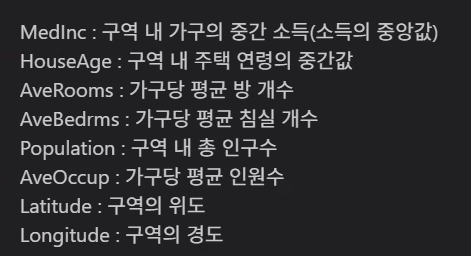

In [5]:
# 데이터프레임에 넣기
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [6]:
df['MedHouseVal'] = data['target']
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


전처리할 데이터는 없고 데이터 분석 바로 하기.
시각화로 분석 ㄱㄱ

### 지도 위에 데이터 시각화하는 코드 추가

https://codingalzi.github.io/datapy/casestudy_california_housing.html

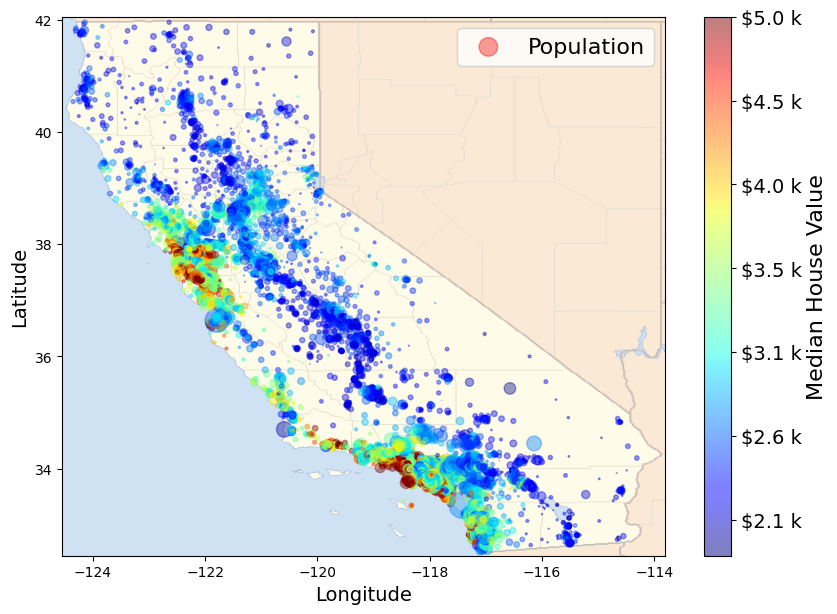

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib.request

# 캘리포니아 지도 이미지 다운로드 (GitHub에서 바로 다운로드)
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/images/end_to_end_project/california.png"
filename = "california.png"
print("Downloading california.png...")
urllib.request.urlretrieve(url, filename)
california_img = mpimg.imread(filename)

# 지도 시각화
ax = df.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(10,7),
             s=df['Population']/100, label="Population",
             c="MedHouseVal", cmap=plt.get_cmap("jet"),
             colorbar=False, alpha=0.4)

# 지도 이미지 오버레이 (coordinates based on the image extent)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# 가격 컬러바 추가
prices = df["MedHouseVal"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%.1f k"%(v) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [9]:
# 데이터프레임에 넣기
df = pd.DataFrame(data.data, columns=data.feature_names)
# df = pd.DataFrame(data['data'], columns=data['feature_names'])

df['MedHouseVal'] = data['target']
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

### 데이터 분할

In [10]:
# train_test_split
from sklearn.model_selection import train_test_split

# 데이터셋 분할
data_train, data_test, target_train, target_test = train_test_split(df.drop("MedHouseVal", axis=1), df["MedHouseVal"], test_size=0.2, random_state=42)

# 데이터셋 확인
print("Training set size:", len(data_train))
print("Test set size:", len(data_test))

Training set size: 16512
Test set size: 4128


In [23]:
# 회귀에 대한 평가지표
# MSE, MAE, RMSE ... kaggle을 살펴보면 다양한 평가지표(log)
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

# plot_predictions : 예측값과 실제값을 산점도로 비교하여 시각화
def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': actual})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

# mse 기준으로 모델의 성능 평가를 해주는 함수
def mse_eval(name_, pred, actual):
    global predictions
    global colors

    # 산점도를 그리고(예측값, 정답값)
    plot_predictions(name_, pred, actual)

    # mse 계산
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    # 모델별 성능을 비교하기 위해 sort
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

# 리스트에 있는 모델중 하나를 삭제하는 함수
def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

### Model 1. LinearRegression

In [14]:
from sklearn.linear_model import LinearRegression

입력되는 변수(Variable)의 갯수가 beta값의 갯수를 좌우한다.

현재 polynomi... 안써도 차수 안해도 

컬럼갯수가 8개여서 x항이 8개야

##### **일반 형태**
$$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5 + \beta_6 x_6 + \beta_7 x_7 + \beta_8 x_8$$

###### $$\mathbf{ h_\theta(x_{i}) = \theta_0+\theta_1 MedInc + \theta_2 HouseAge + \theta_3 AveRooms + \theta_4 AveBedrms + \theta_5 Population + \theta_6 AveOccup + \theta_7 Latitude + \theta_8 Longitude }$$

수식이 길어지면 overfitting이 발생할 수 있다. -> 위는 우리가 사용할 잡값 관련 변수들이 8개여서 항이 8+1개.

In [ ]:
# data_train, data_test, target_train, target_test

# 1. 모델 생성
model = LinearRegression()

# 2. 모델 학슴
model.fit(data_train, target_train)

# 3. 모델 예측 : 예측값을 받아올 때
y_pred = model.predict(data_test) 

# 4. 모델 평가
mse = mean_absolute_error(target_test, y_pred)

print(mse)

0.5332001304956555


In [ ]:
print(model.coef_)
print(model.intercept_)


[ 4.4867e-01  9.7243e-03 -1.2332e-01  7.8314e-01 -2.0296e-06 -3.5263e-03
 -4.1979e-01 -4.3371e-01]
-37.02327770606416


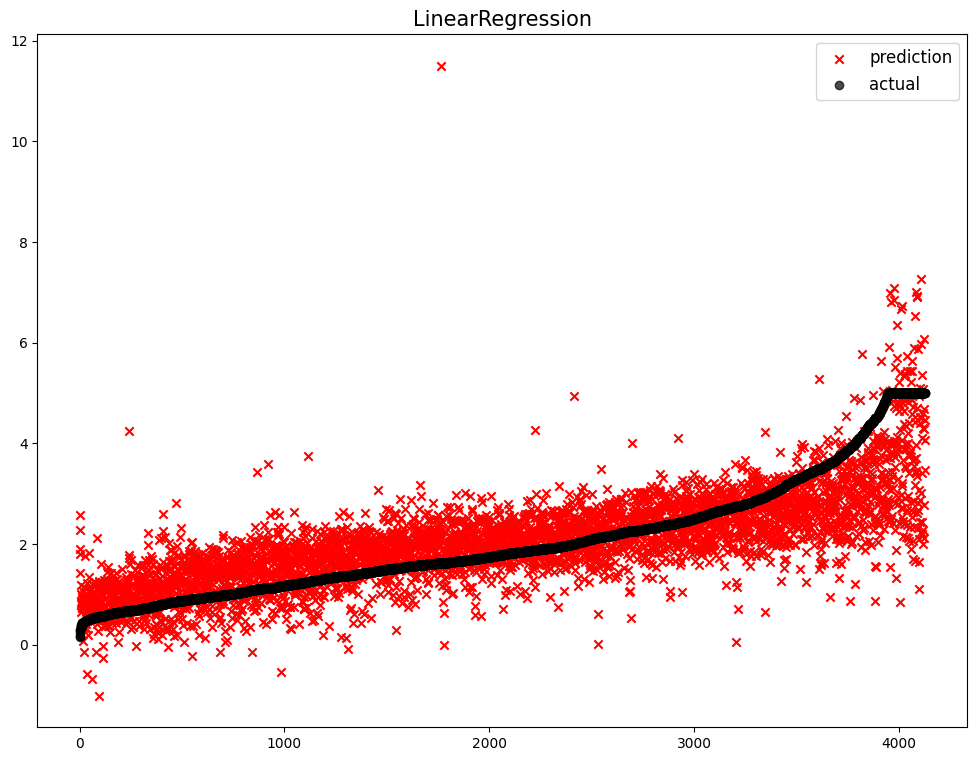

              model       mse
0  LinearRegression  0.555892


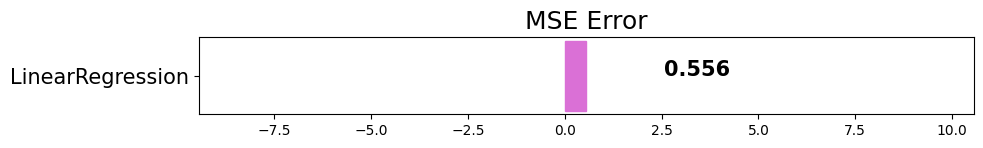

In [25]:
# mse_eval()함수를 사용 : 모델을 리스트에 추가할 때 모델명

mse_eval('LinearRegression', y_pred, target_test)

#### 규제(Regularization = penalty). not 정규화
#### L1 penalty, L2 penalty

**라쏘(Lasso) - L1 규제**  

$Error=MSE+α|w|$

**릿지(Ridge) - L2 규제**

$Error=MSE+αw^2$ 

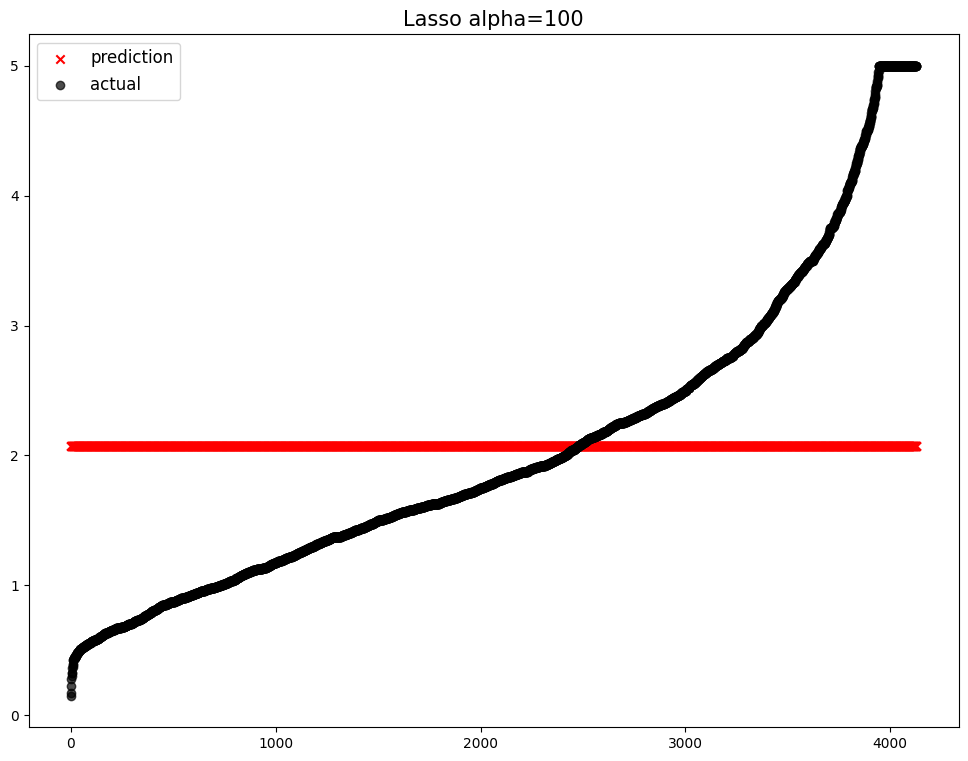

                model       mse
0     Ridge alpha=100  1.310696
1     Lasso alpha=100  1.310696
2      Ridge alpha=10  1.310227
3       Ridge alpha=1  0.938034
4     Ridge alpha=0.1  0.613512
5    LinearRegression  0.555892
6  Ridge alpha=0.0001  0.555683
7   Ridge alpha=0.001  0.553894
8    Ridge alpha=0.01  0.544449


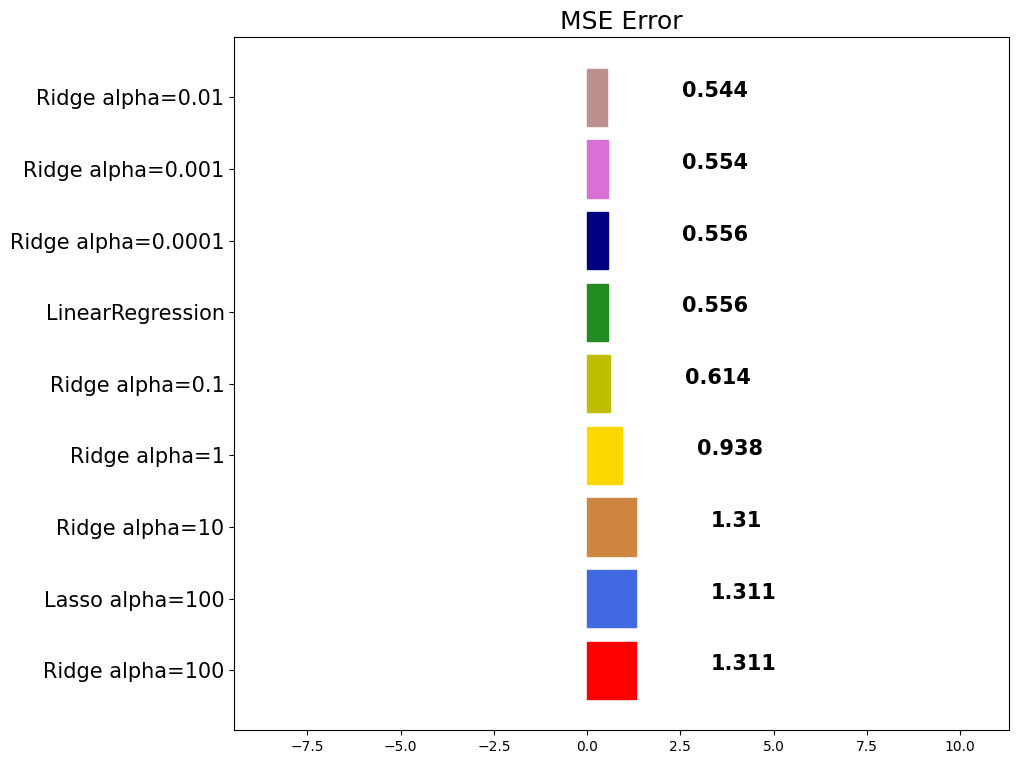

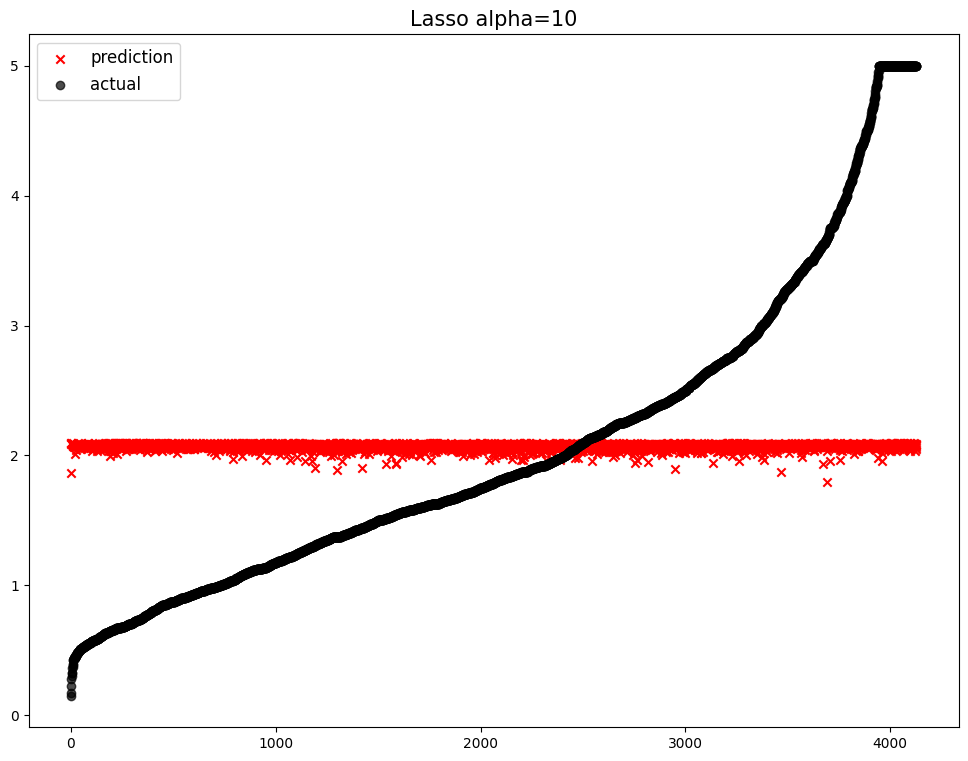

                model       mse
0     Ridge alpha=100  1.310696
1     Lasso alpha=100  1.310696
2      Ridge alpha=10  1.310227
3      Lasso alpha=10  1.310227
4       Ridge alpha=1  0.938034
5     Ridge alpha=0.1  0.613512
6    LinearRegression  0.555892
7  Ridge alpha=0.0001  0.555683
8   Ridge alpha=0.001  0.553894
9    Ridge alpha=0.01  0.544449


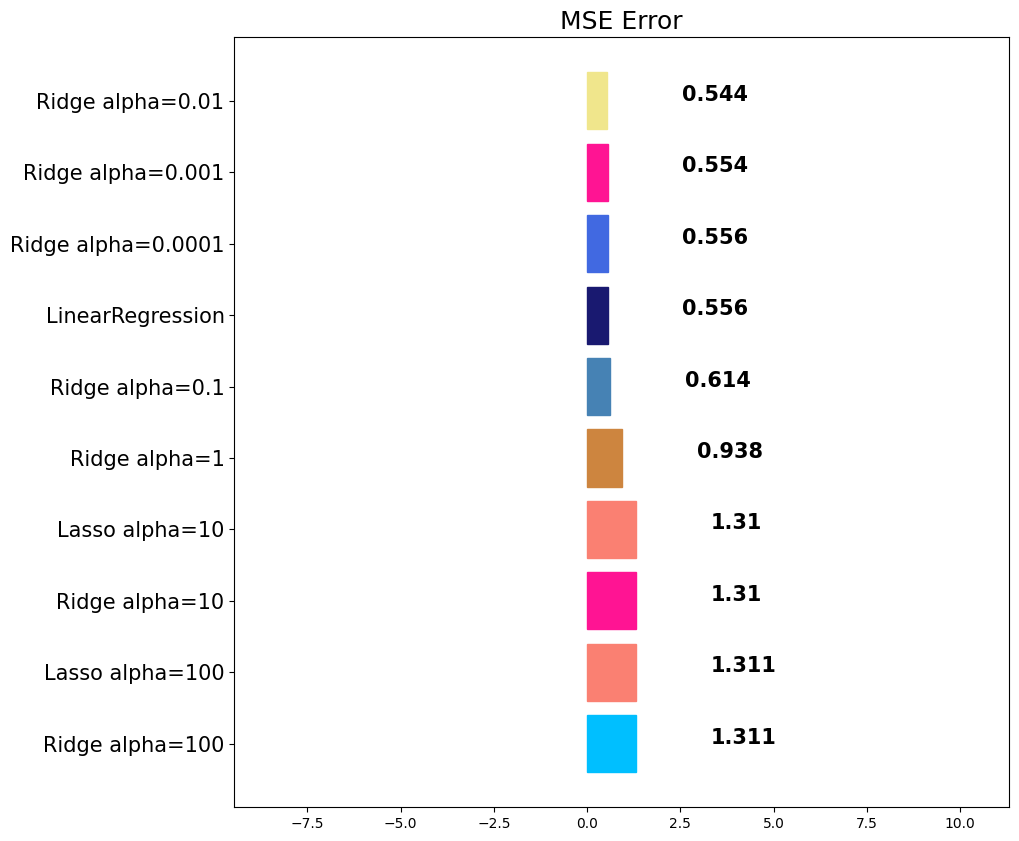

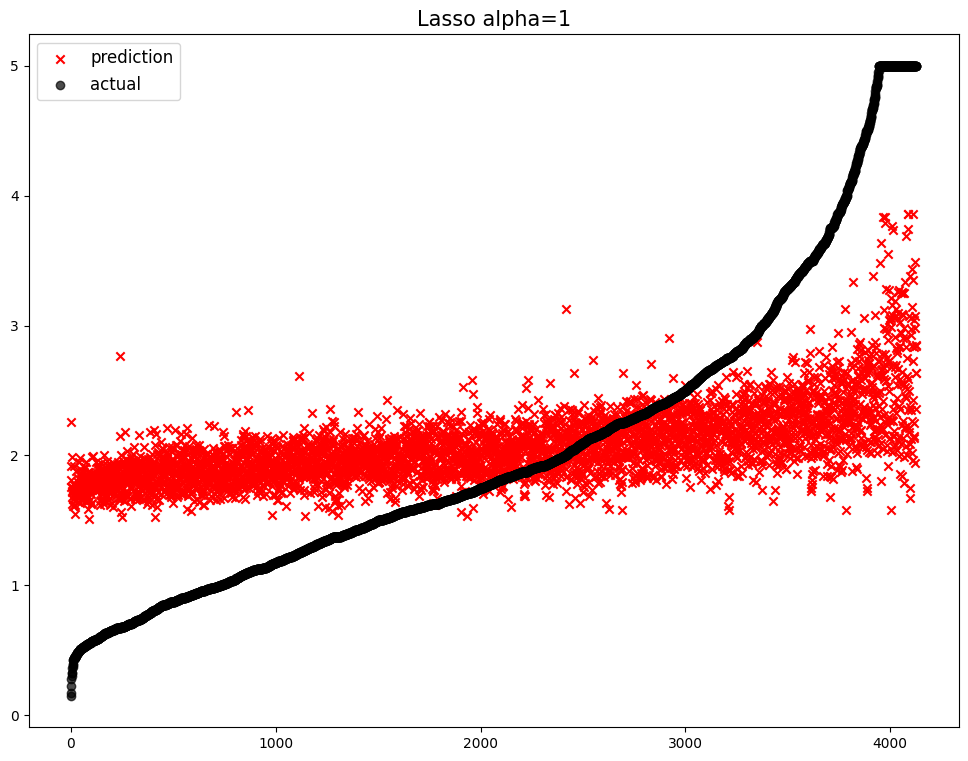

                 model       mse
0      Ridge alpha=100  1.310696
1      Lasso alpha=100  1.310696
2       Ridge alpha=10  1.310227
3       Lasso alpha=10  1.310227
4        Ridge alpha=1  0.938034
5        Lasso alpha=1  0.938034
6      Ridge alpha=0.1  0.613512
7     LinearRegression  0.555892
8   Ridge alpha=0.0001  0.555683
9    Ridge alpha=0.001  0.553894
10    Ridge alpha=0.01  0.544449


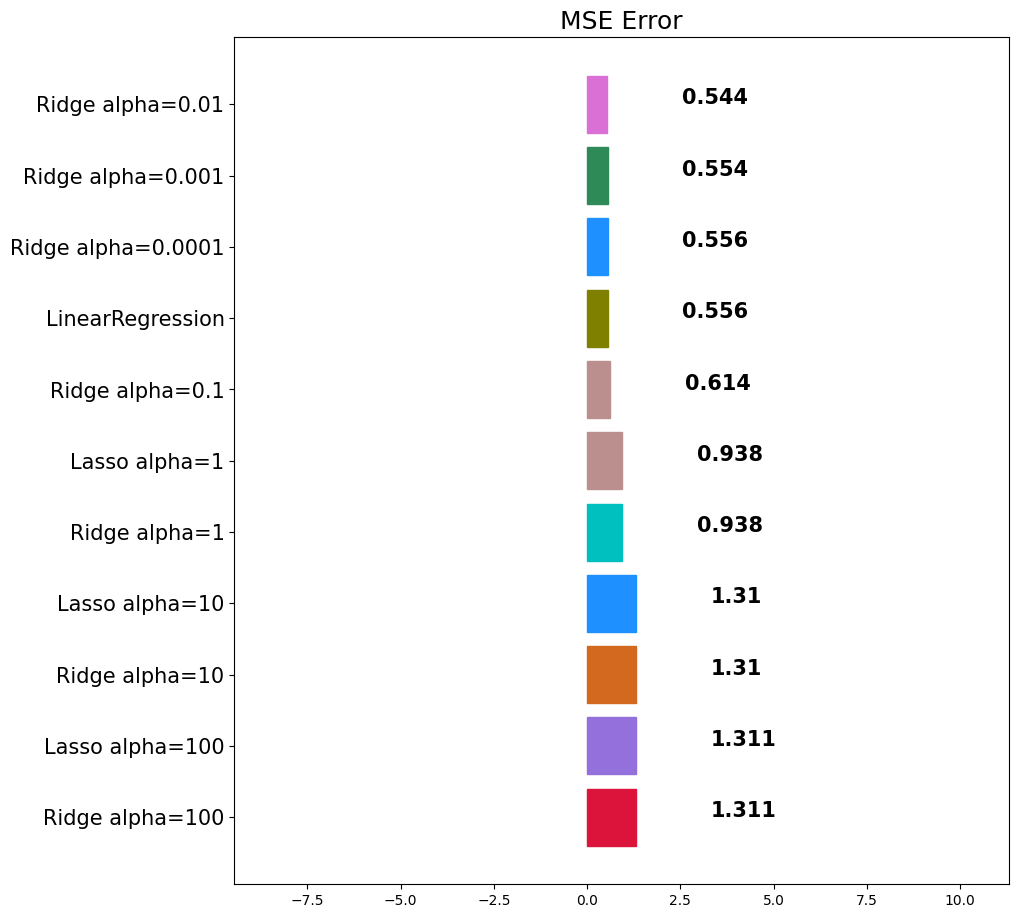

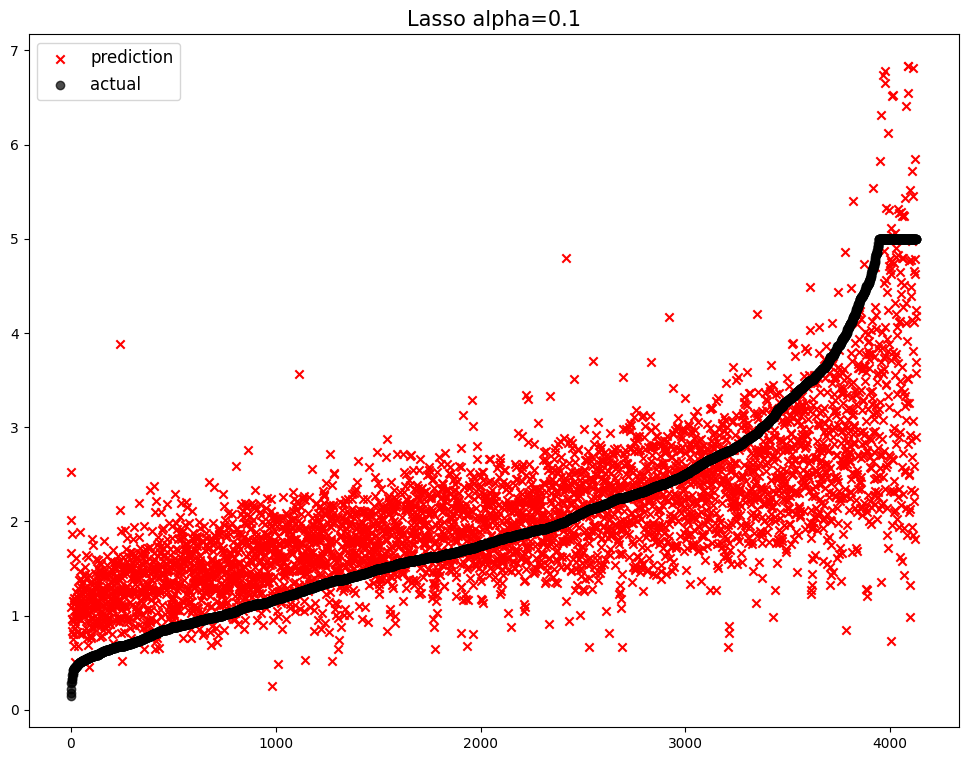

                 model       mse
0      Ridge alpha=100  1.310696
1      Lasso alpha=100  1.310696
2       Ridge alpha=10  1.310227
3       Lasso alpha=10  1.310227
4        Ridge alpha=1  0.938034
5        Lasso alpha=1  0.938034
6      Ridge alpha=0.1  0.613512
7      Lasso alpha=0.1  0.613512
8     LinearRegression  0.555892
9   Ridge alpha=0.0001  0.555683
10   Ridge alpha=0.001  0.553894
11    Ridge alpha=0.01  0.544449


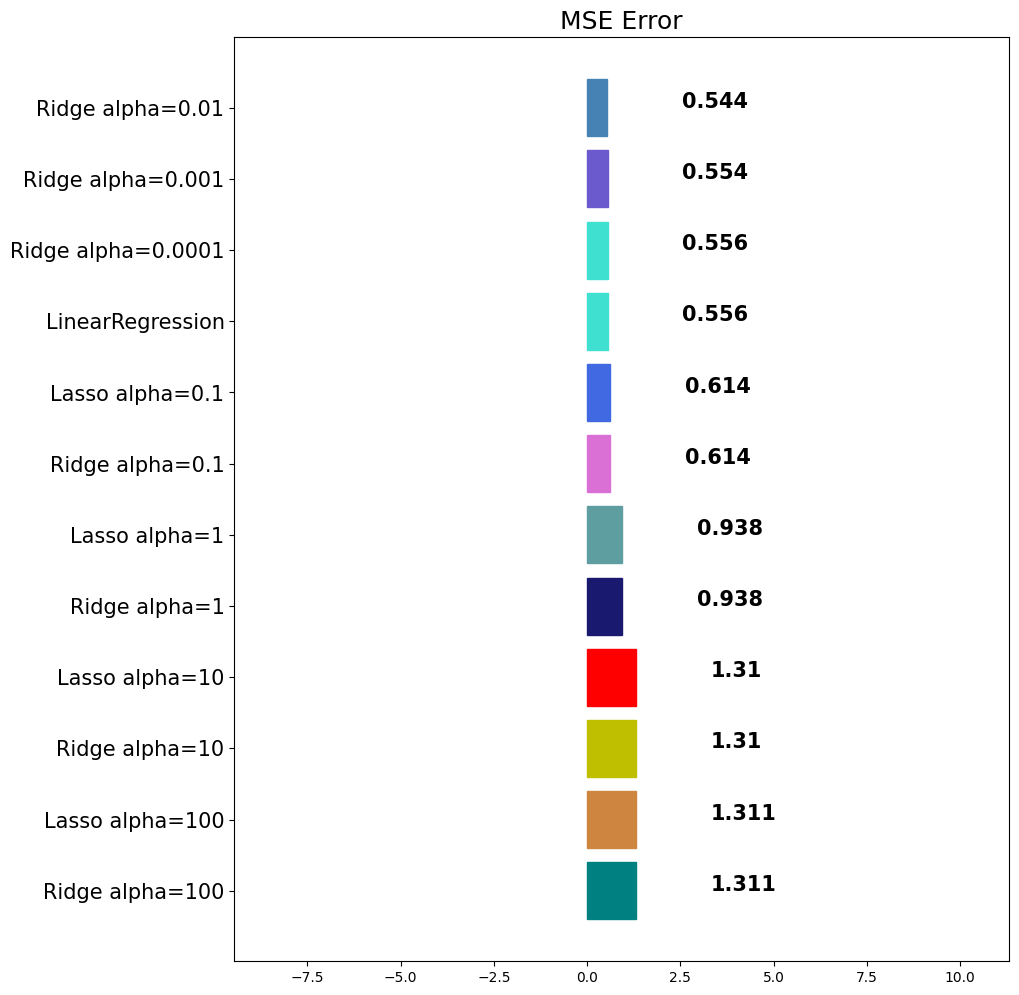

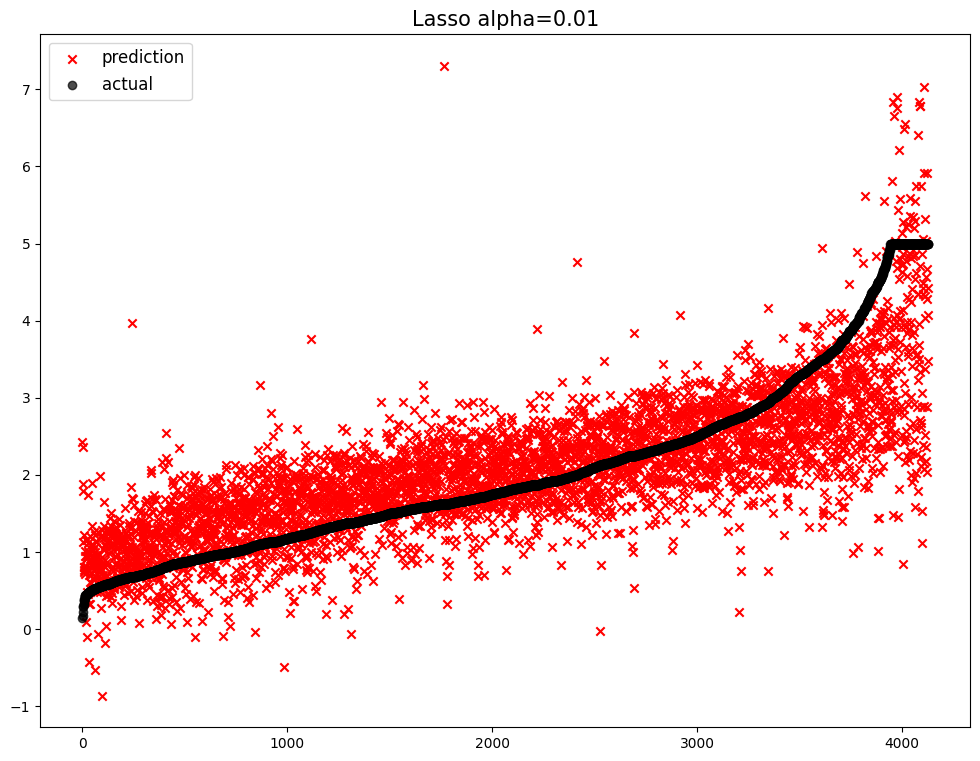

                 model       mse
0      Ridge alpha=100  1.310696
1      Lasso alpha=100  1.310696
2       Ridge alpha=10  1.310227
3       Lasso alpha=10  1.310227
4        Ridge alpha=1  0.938034
5        Lasso alpha=1  0.938034
6      Ridge alpha=0.1  0.613512
7      Lasso alpha=0.1  0.613512
8     LinearRegression  0.555892
9   Ridge alpha=0.0001  0.555683
10   Ridge alpha=0.001  0.553894
11    Ridge alpha=0.01  0.544449
12    Lasso alpha=0.01  0.544449


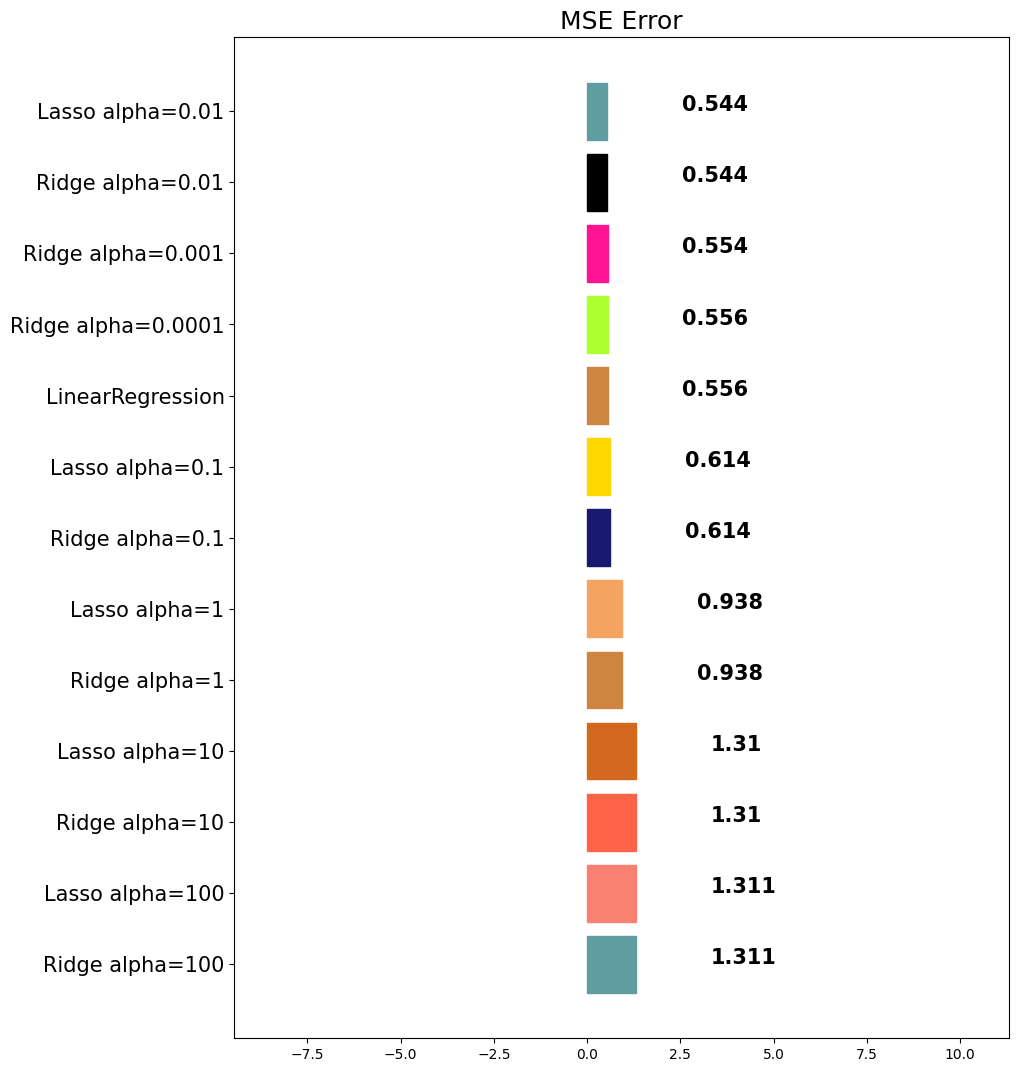

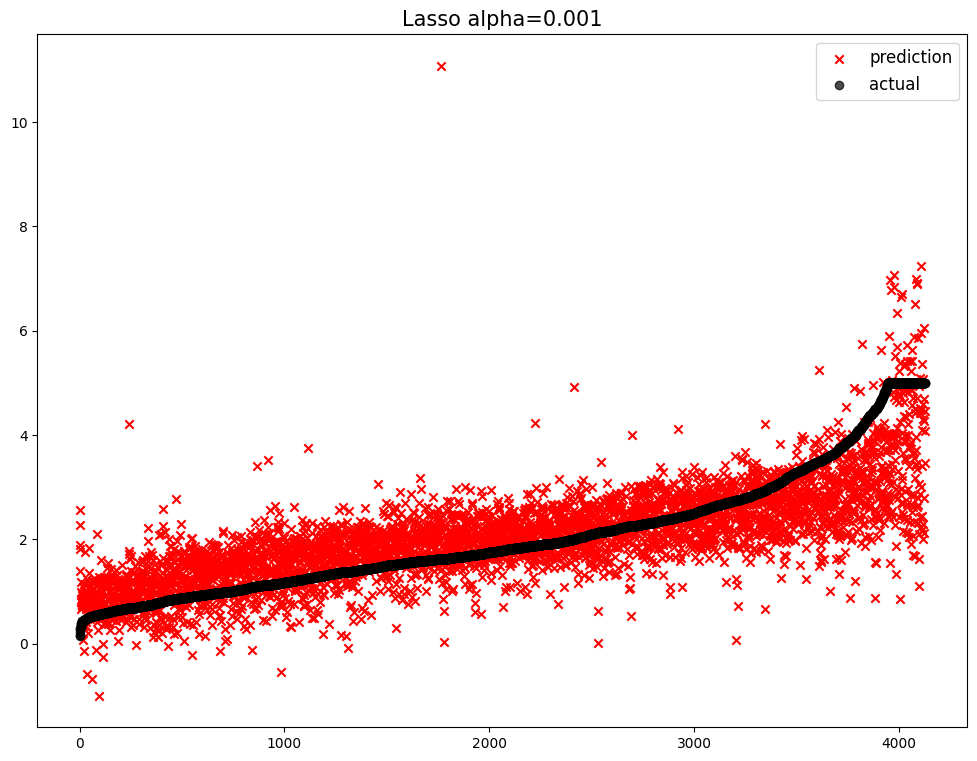

                 model       mse
0      Ridge alpha=100  1.310696
1      Lasso alpha=100  1.310696
2       Ridge alpha=10  1.310227
3       Lasso alpha=10  1.310227
4        Ridge alpha=1  0.938034
5        Lasso alpha=1  0.938034
6      Ridge alpha=0.1  0.613512
7      Lasso alpha=0.1  0.613512
8     LinearRegression  0.555892
9   Ridge alpha=0.0001  0.555683
10   Ridge alpha=0.001  0.553894
11   Lasso alpha=0.001  0.553894
12    Ridge alpha=0.01  0.544449
13    Lasso alpha=0.01  0.544449


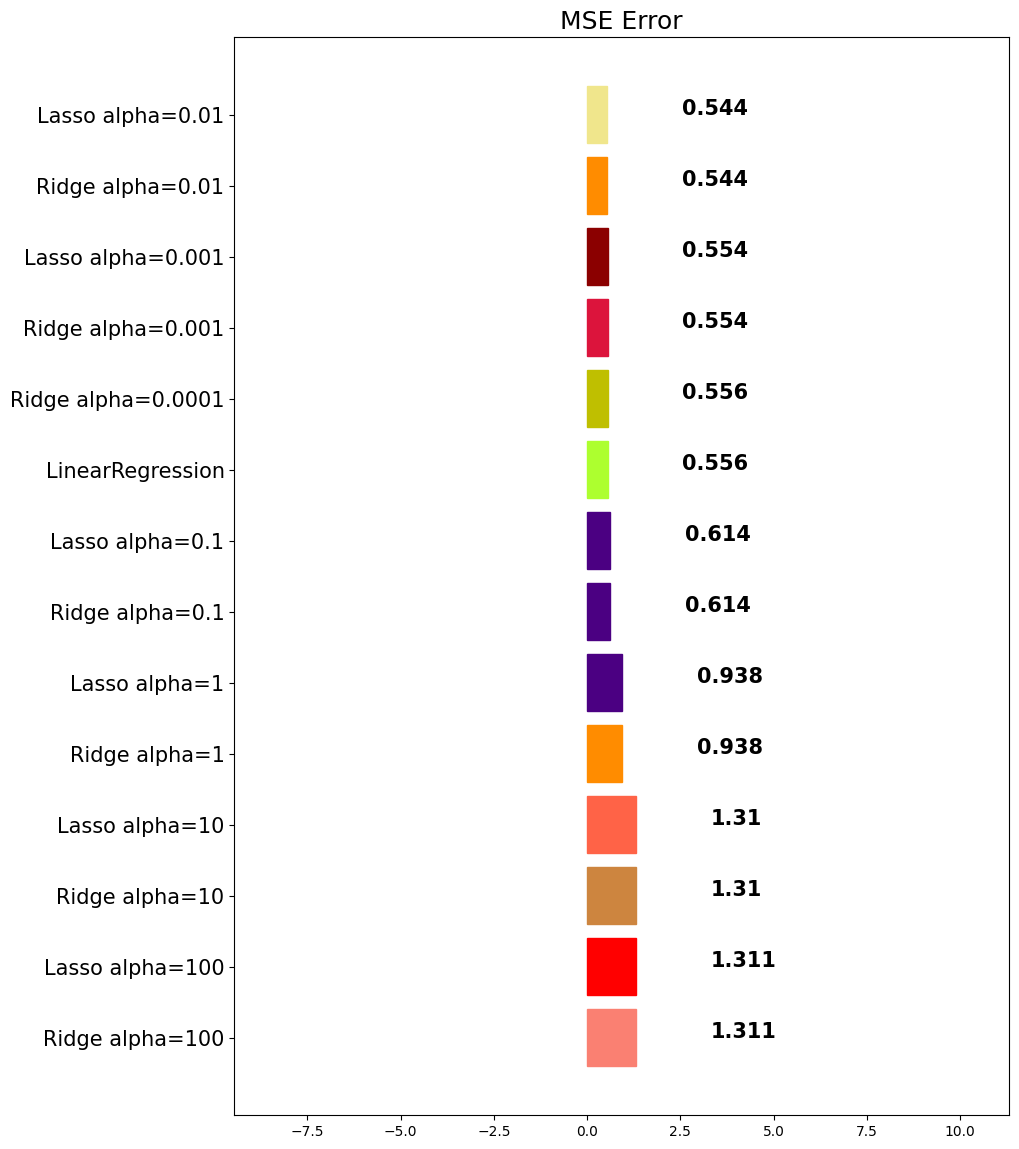

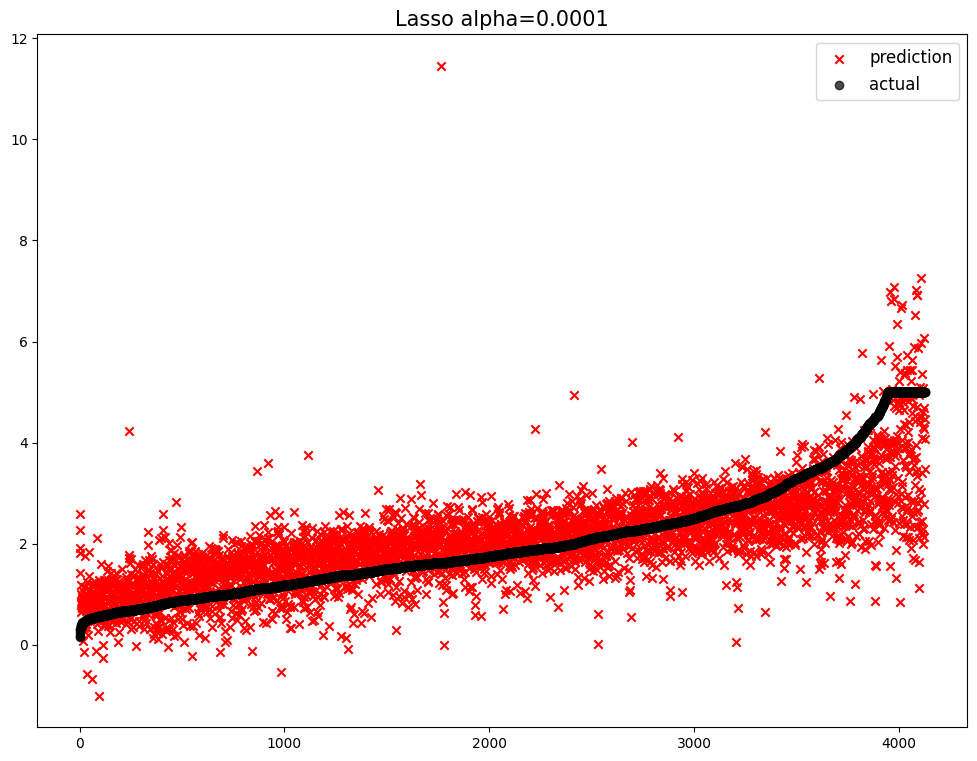

                 model       mse
0      Ridge alpha=100  1.310696
1      Lasso alpha=100  1.310696
2       Ridge alpha=10  1.310227
3       Lasso alpha=10  1.310227
4        Ridge alpha=1  0.938034
5        Lasso alpha=1  0.938034
6      Ridge alpha=0.1  0.613512
7      Lasso alpha=0.1  0.613512
8     LinearRegression  0.555892
9   Ridge alpha=0.0001  0.555683
10  Lasso alpha=0.0001  0.555683
11   Ridge alpha=0.001  0.553894
12   Lasso alpha=0.001  0.553894
13    Ridge alpha=0.01  0.544449
14    Lasso alpha=0.01  0.544449


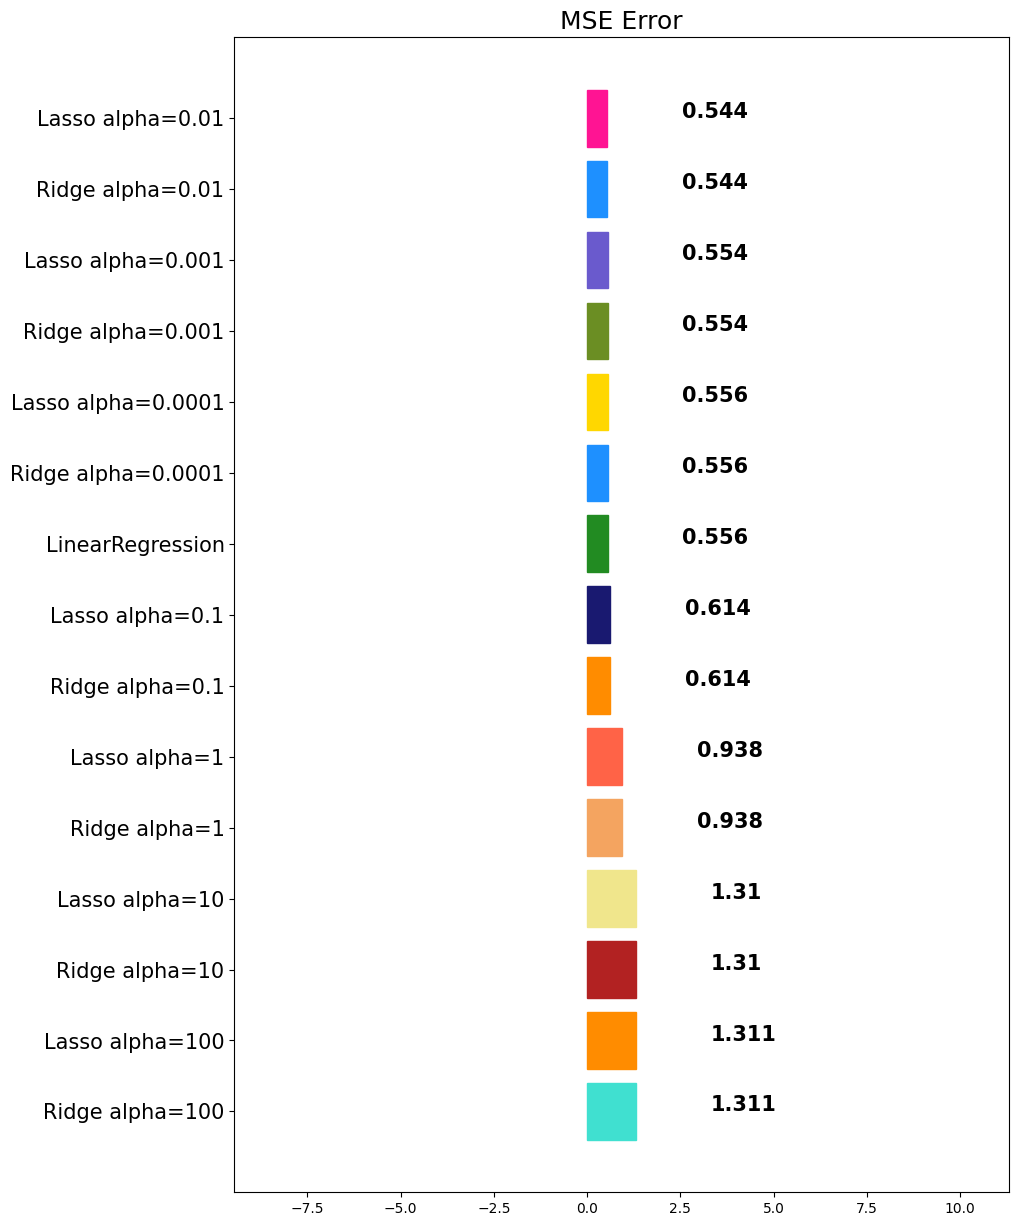

In [31]:
# Lasso Regression : L1 Penalty
# Ridge Regression : L2 Penalty

from sklearn.linear_model import Lasso, Ridge

# Lasso Regression : L1 penalty
# Ridge Regression : L2 penalty
from sklearn.linear_model import Ridge, Lasso

alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
# 100만큼 규제를 주면 성능이 오히려 안좋아져
# 0.01 규제한 결과가 제일 성능좋아. 규제를 작게갈때 성능이 좋구나

for alpha in alphas:
    # 1. 모델 생성
    model = Lasso(alpha=alpha)
    # 2. 모델 학습
    model.fit(data_train, target_train)
    # 3. 모델 예측
    y_pred = model.predict(data_test)
    # 4. 모델 평가
    mse = mean_squared_error(target_test, y_pred)
    mse_eval(f'Lasso alpha={alpha}', y_pred, target_test)


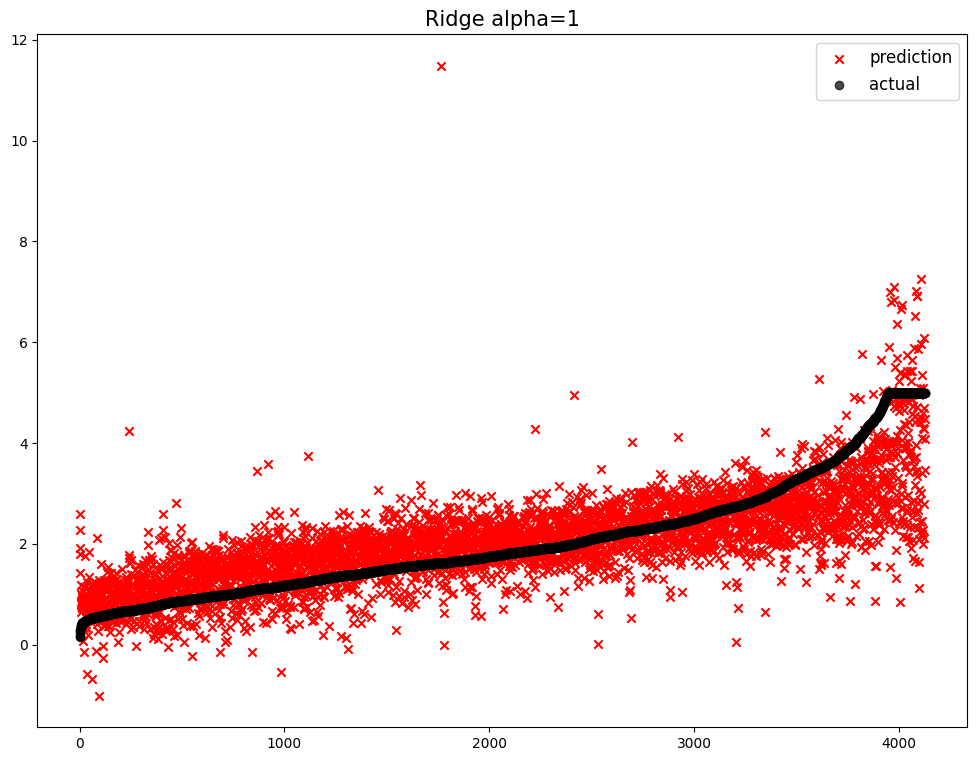

                 model       mse
0      Ridge alpha=100  1.310696
1      Lasso alpha=100  1.310696
2       Ridge alpha=10  1.310227
3       Lasso alpha=10  1.310227
4        Lasso alpha=1  0.938034
5      Ridge alpha=0.1  0.613512
6      Lasso alpha=0.1  0.613512
7     LinearRegression  0.555892
8        Ridge alpha=1  0.555803
9   Ridge alpha=0.0001  0.555683
10  Lasso alpha=0.0001  0.555683
11   Ridge alpha=0.001  0.553894
12   Lasso alpha=0.001  0.553894
13    Ridge alpha=0.01  0.544449
14    Lasso alpha=0.01  0.544449


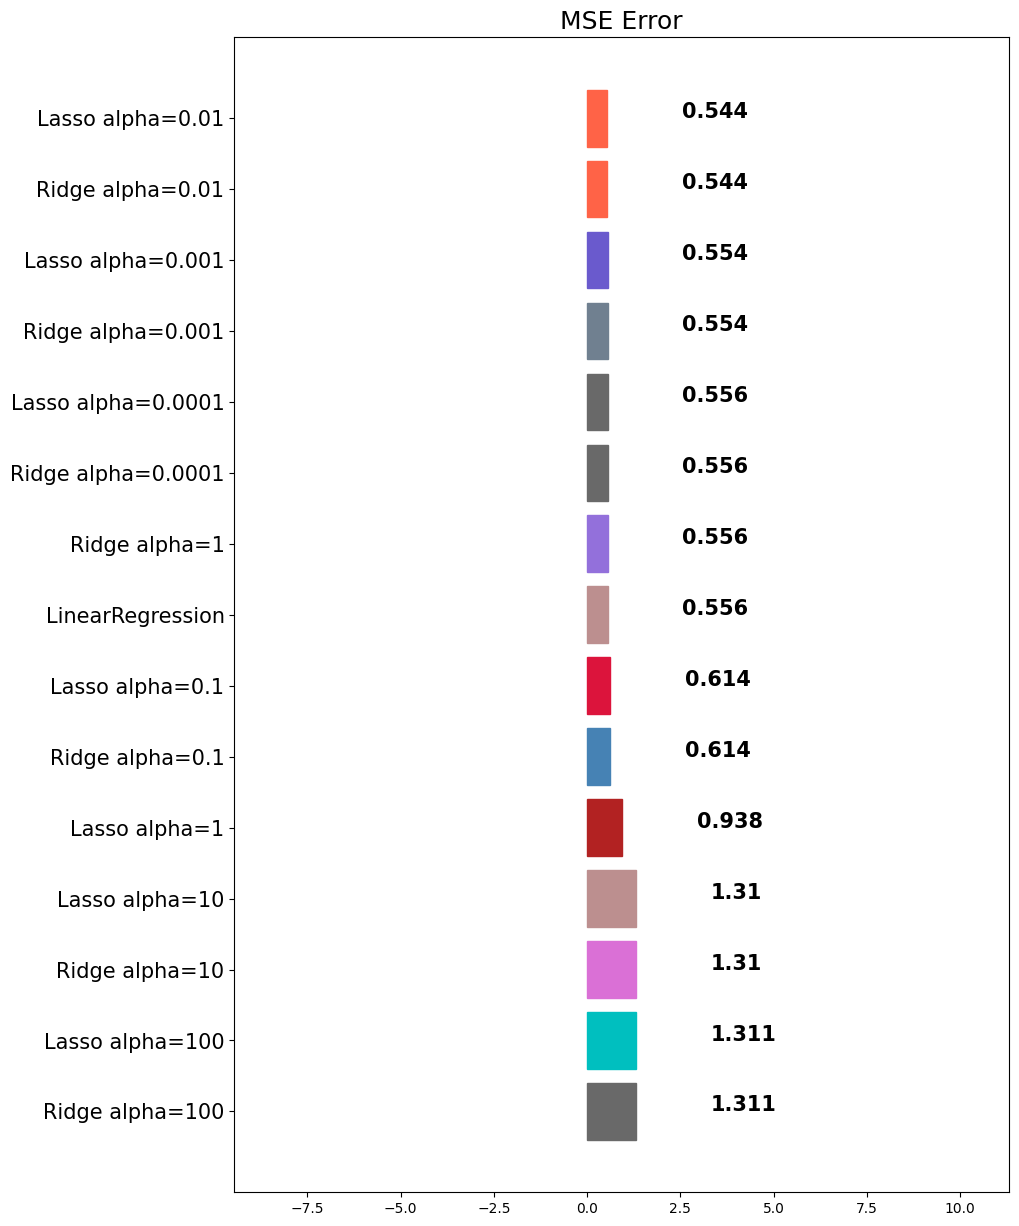

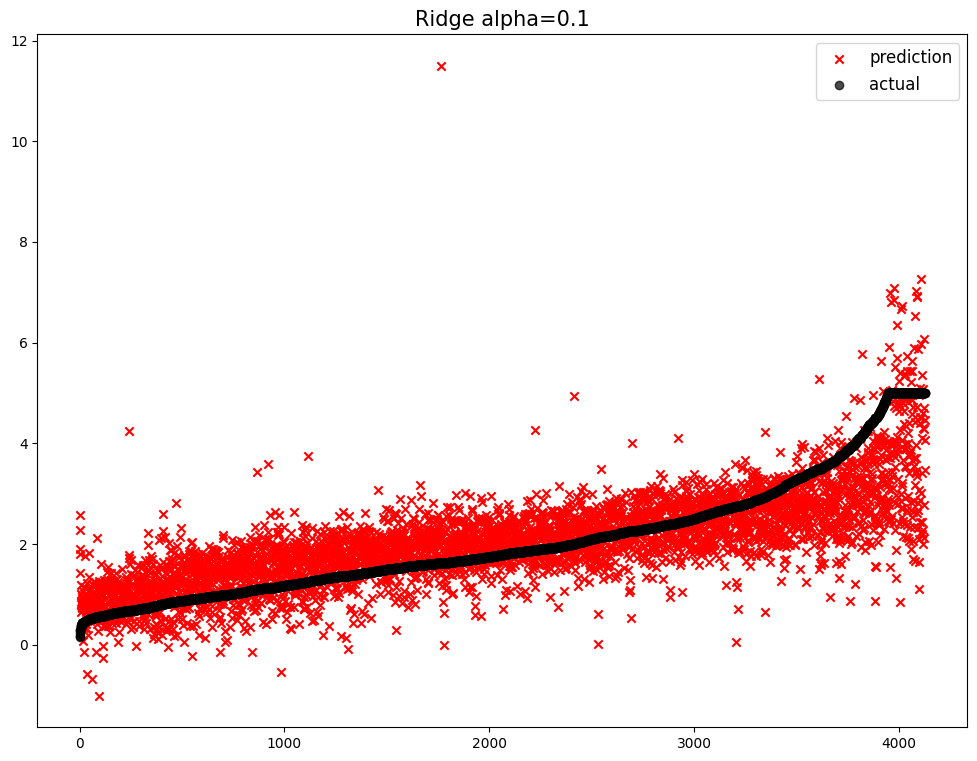

                 model       mse
0      Ridge alpha=100  1.310696
1      Lasso alpha=100  1.310696
2       Ridge alpha=10  1.310227
3       Lasso alpha=10  1.310227
4        Lasso alpha=1  0.938034
5      Lasso alpha=0.1  0.613512
6     LinearRegression  0.555892
7      Ridge alpha=0.1  0.555883
8        Ridge alpha=1  0.555803
9   Ridge alpha=0.0001  0.555683
10  Lasso alpha=0.0001  0.555683
11   Ridge alpha=0.001  0.553894
12   Lasso alpha=0.001  0.553894
13    Ridge alpha=0.01  0.544449
14    Lasso alpha=0.01  0.544449


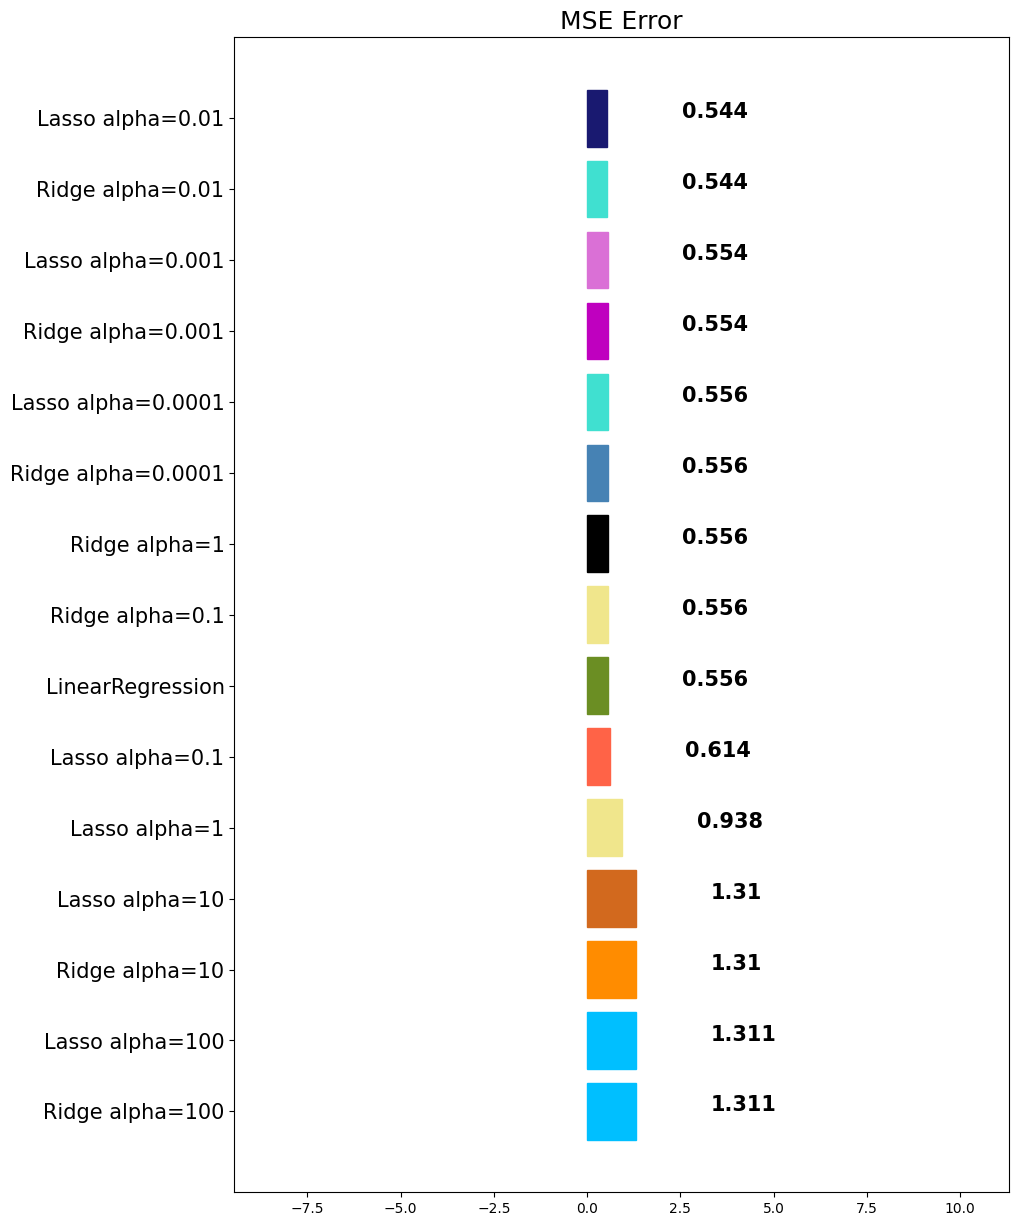

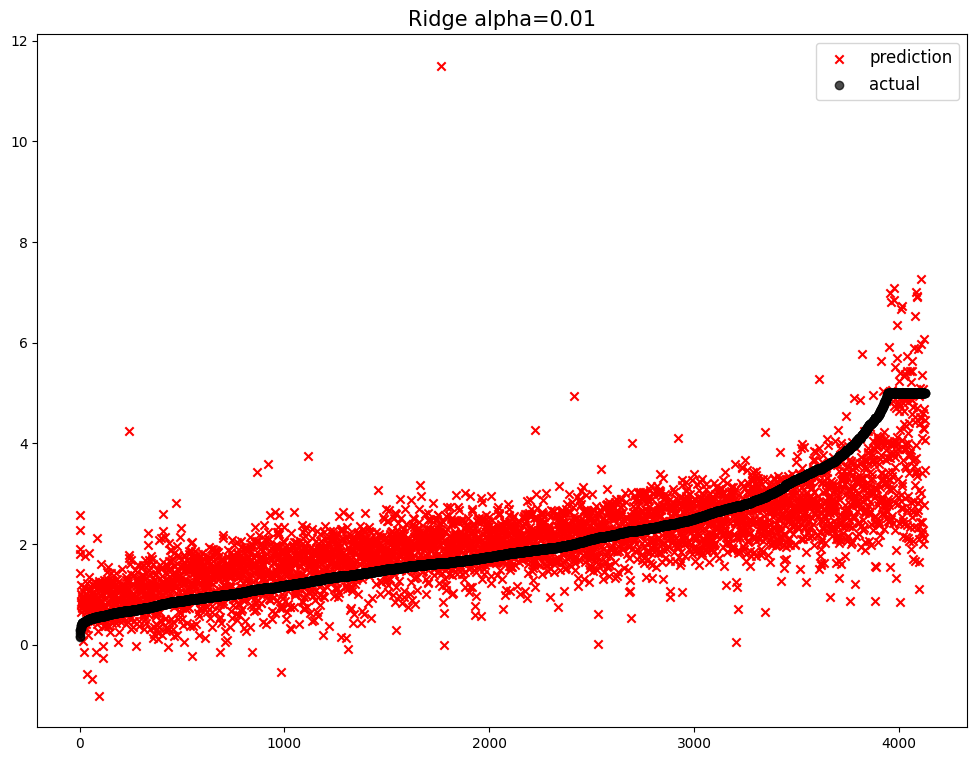

                 model       mse
0      Ridge alpha=100  1.310696
1      Lasso alpha=100  1.310696
2       Ridge alpha=10  1.310227
3       Lasso alpha=10  1.310227
4        Lasso alpha=1  0.938034
5      Lasso alpha=0.1  0.613512
6     LinearRegression  0.555892
7     Ridge alpha=0.01  0.555891
8      Ridge alpha=0.1  0.555883
9        Ridge alpha=1  0.555803
10  Ridge alpha=0.0001  0.555683
11  Lasso alpha=0.0001  0.555683
12   Ridge alpha=0.001  0.553894
13   Lasso alpha=0.001  0.553894
14    Lasso alpha=0.01  0.544449


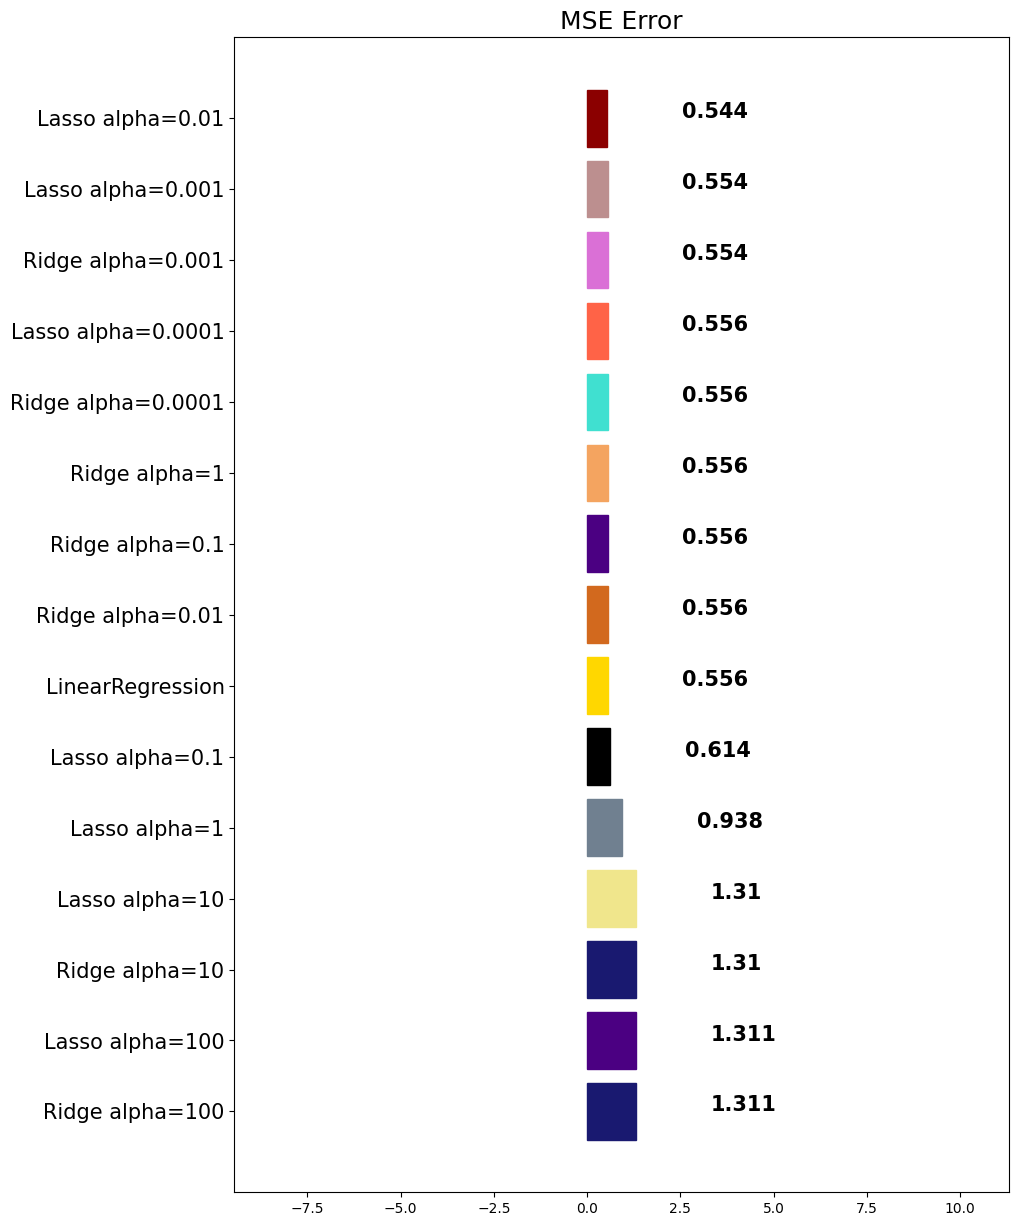

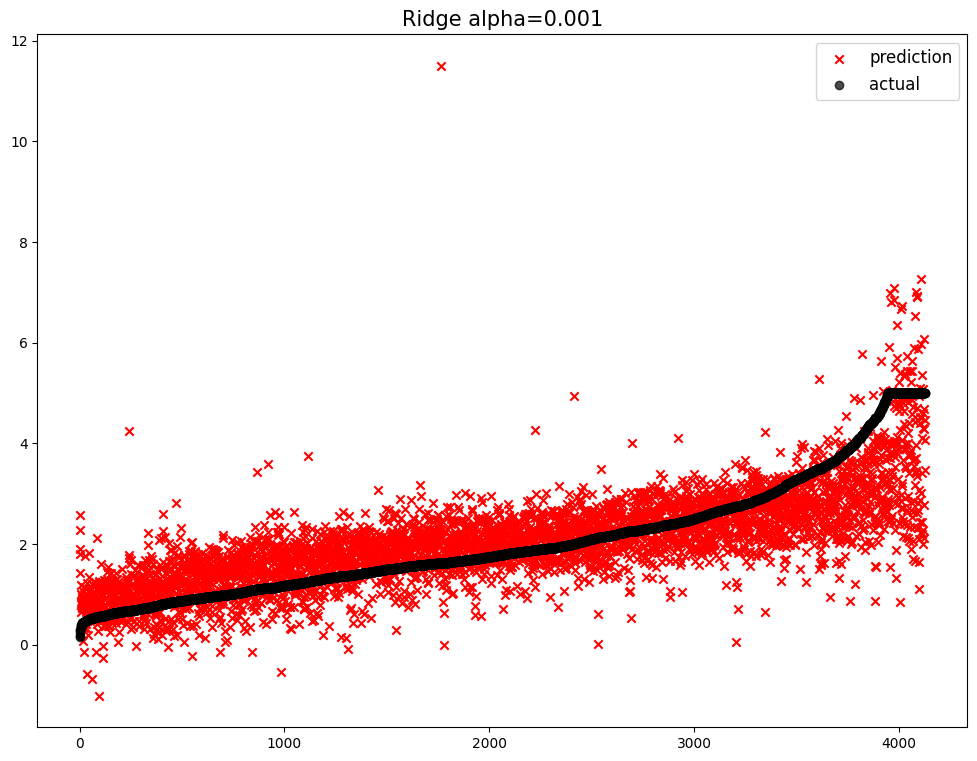

                 model       mse
0      Ridge alpha=100  1.310696
1      Lasso alpha=100  1.310696
2       Ridge alpha=10  1.310227
3       Lasso alpha=10  1.310227
4        Lasso alpha=1  0.938034
5      Lasso alpha=0.1  0.613512
6     LinearRegression  0.555892
7    Ridge alpha=0.001  0.555892
8     Ridge alpha=0.01  0.555891
9      Ridge alpha=0.1  0.555883
10       Ridge alpha=1  0.555803
11  Ridge alpha=0.0001  0.555683
12  Lasso alpha=0.0001  0.555683
13   Lasso alpha=0.001  0.553894
14    Lasso alpha=0.01  0.544449


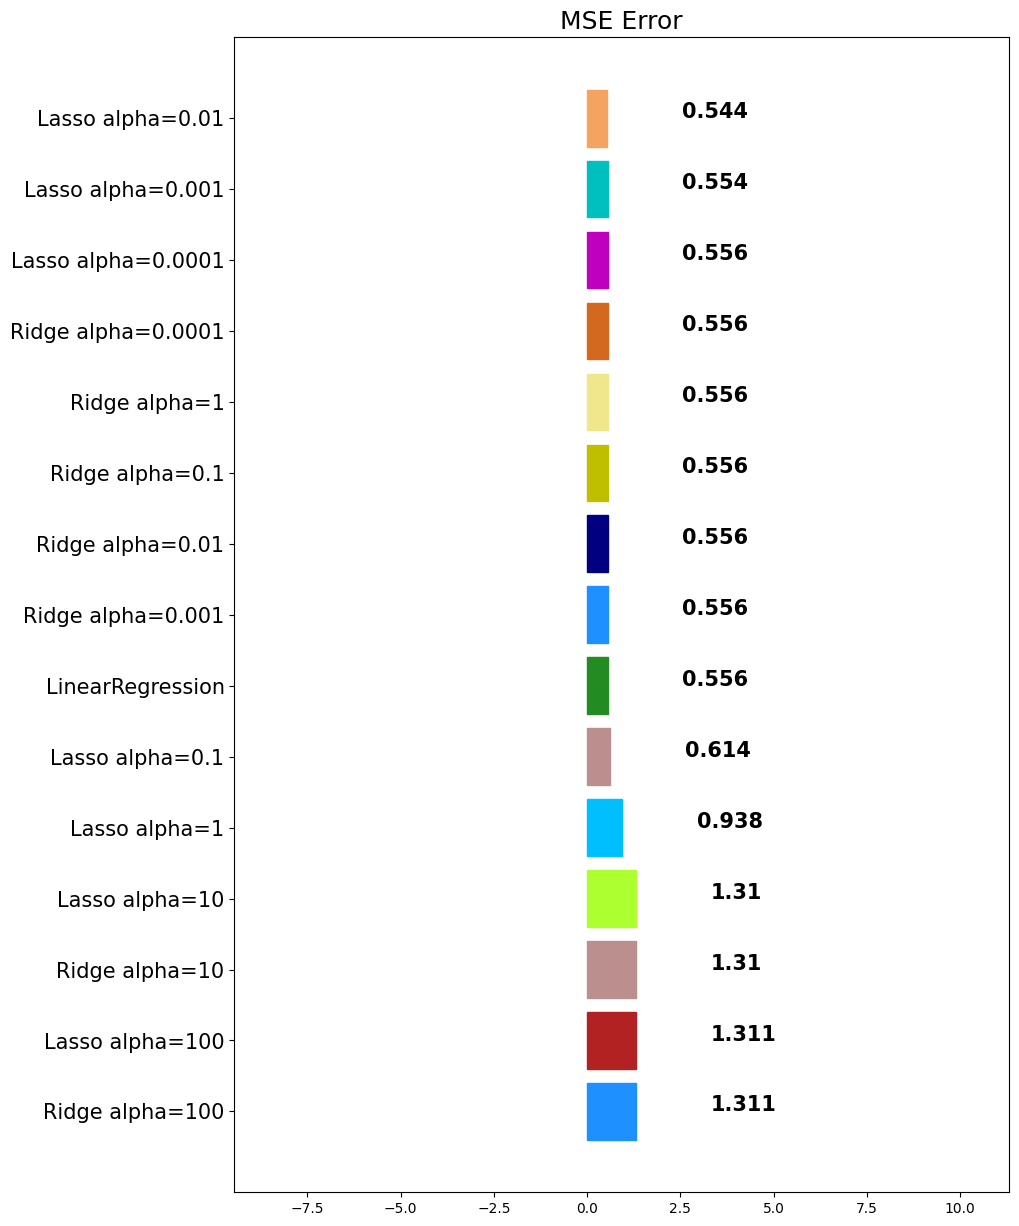

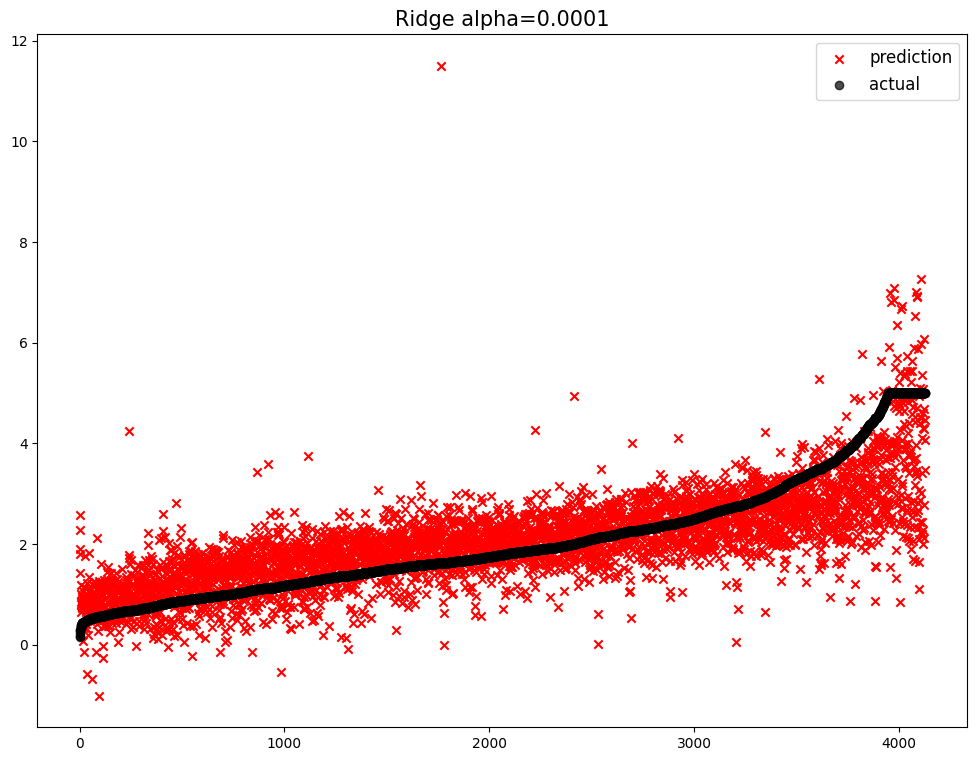

                 model       mse
0      Ridge alpha=100  1.310696
1      Lasso alpha=100  1.310696
2       Ridge alpha=10  1.310227
3       Lasso alpha=10  1.310227
4        Lasso alpha=1  0.938034
5      Lasso alpha=0.1  0.613512
6     LinearRegression  0.555892
7   Ridge alpha=0.0001  0.555892
8    Ridge alpha=0.001  0.555892
9     Ridge alpha=0.01  0.555891
10     Ridge alpha=0.1  0.555883
11       Ridge alpha=1  0.555803
12  Lasso alpha=0.0001  0.555683
13   Lasso alpha=0.001  0.553894
14    Lasso alpha=0.01  0.544449


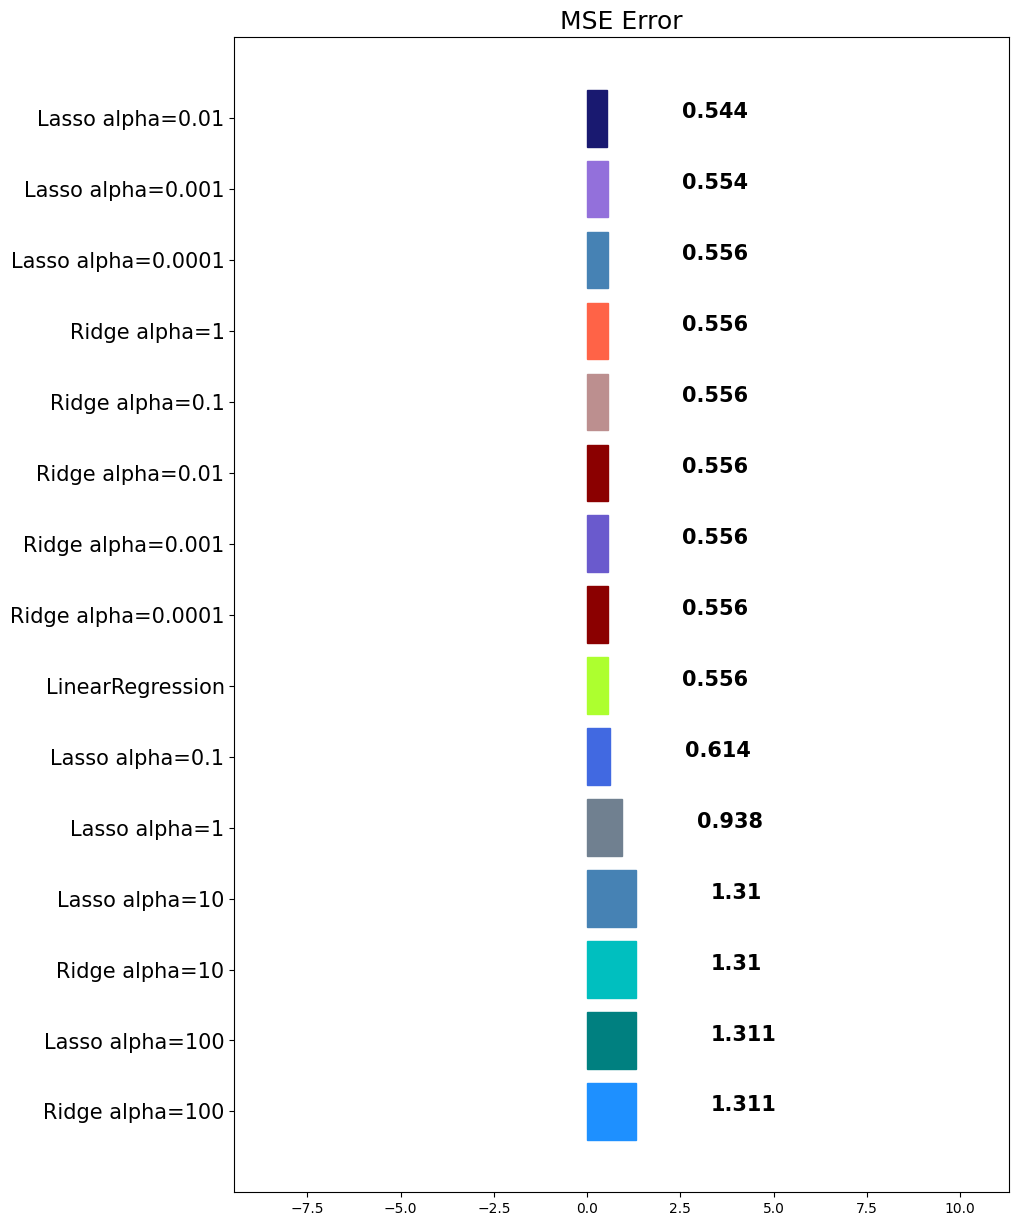

In [32]:
# Lasso Regression : L1 Penalty
# !! Ridge Regression : L2 Penalty

alphas = [1, 0.1, 0.01, 0.001, 0.0001]

for alpha in alphas:
    # 1. 모델 생성
    model = Ridge(alpha=alpha)
    # 2. 모델 학습
    model.fit(data_train, target_train)
    # 3. 모델 예측
    y_pred = model.predict(data_test)
    # 4. 모델 평가
    mse = mean_squared_error(target_test, y_pred)
    mse_eval(f'Ridge alpha={alpha}', y_pred, target_test)


In [35]:
# coef 값을 시각화하는 함수

def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

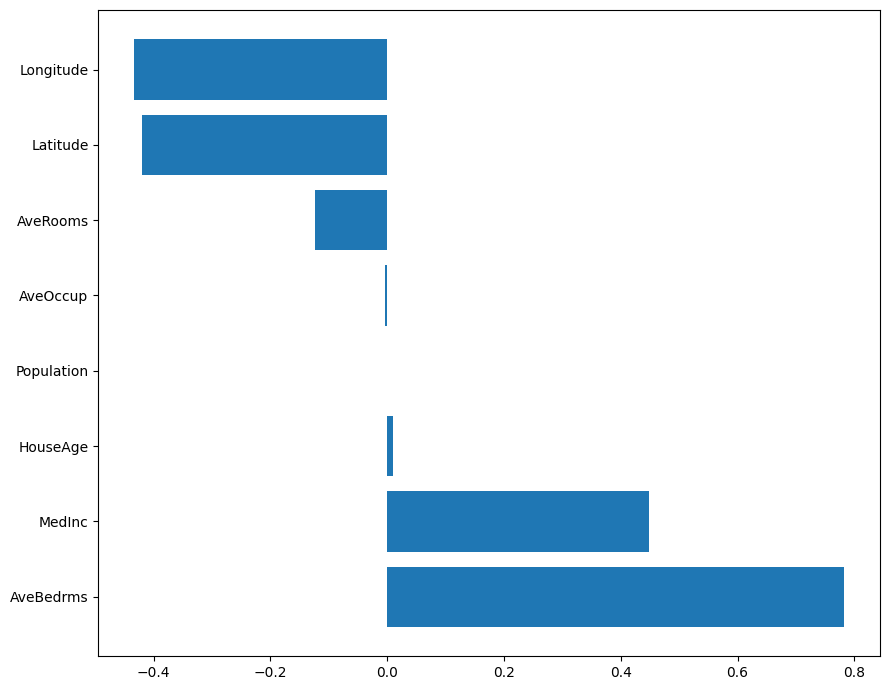

In [37]:
plot_coef(data_test.columns, model.coef_)

In [46]:
# ridge = Ridge(alpha=1.0)

lasso_1 = Lasso(alpha=1)
lasso_1.fit(data_train, target_train)
lasso_pred_1 = lasso_1.predict(data_test)

lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(data_train, target_train)
lasso_pred_001 = lasso_001.predict(data_test)

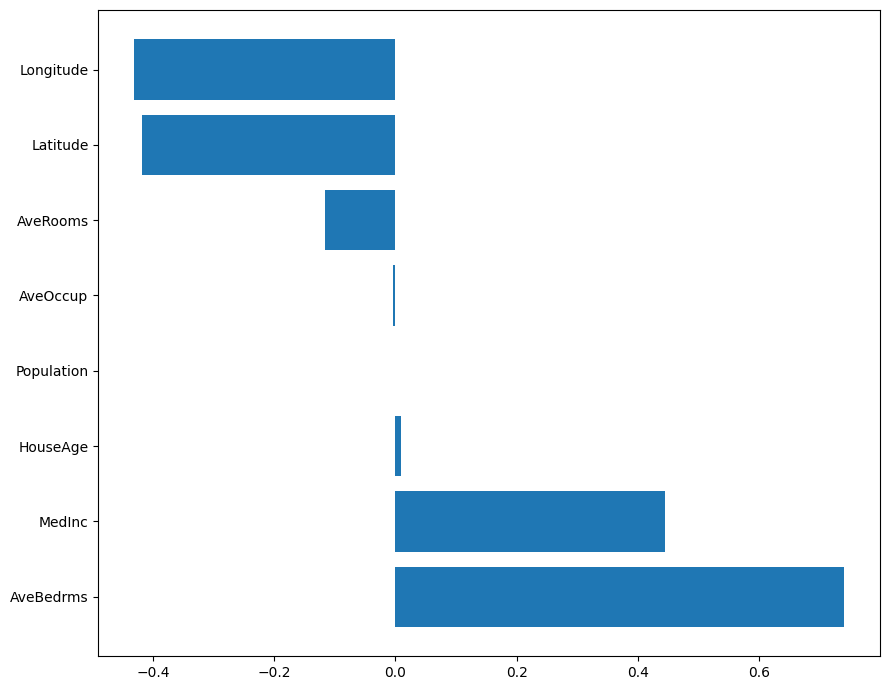

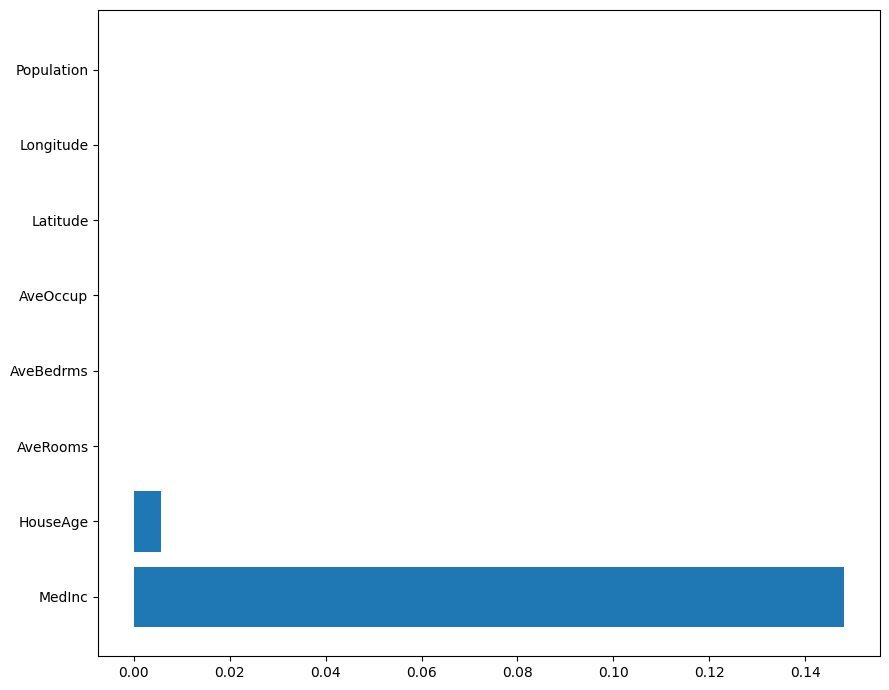

In [47]:
plot_coef(data_train.columns, lasso_001.coef_)
plot_coef(data_train.columns, lasso_1.coef_)

### L1 + L2 -> ElasticNet

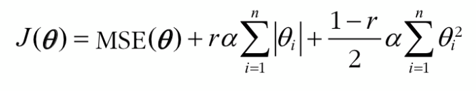

**l1_ratio (default=0.5)**

 * l1_ratio = 0 (L2 규제만 사용). 
 * l1_ratio = 1 (L1 규제만 사용). 
 * 0 < l1_ratio < 1 (L1 and L2 규제의 혼합사용)

In [49]:
from sklearn.linear_model import ElasticNet

ratios = [0.1, 0.3, 0.5, 0.7, 0.9]

# L1_ratio의 값이 클 때 (L1의 비중을 크게 설정할 때) 성능이 떨어질 수 있다.
for ratio in ratios:
    model = ElasticNet(alpha=0.5, l1_ratio=ratio, random_state=42)
    model.fit(data_train, target_train)
    y_pred = model.predict(data_test)
    print(f"Ratio: {ratio}, RMSE: {np.sqrt(mean_squared_error(target_test, y_pred))}")

Ratio: 0.1, RMSE: 0.7852243120786745
Ratio: 0.3, RMSE: 0.8187332850874025
Ratio: 0.5, RMSE: 0.8287780633584366
Ratio: 0.7, RMSE: 0.8366982880877543
Ratio: 0.9, RMSE: 0.846577317743052


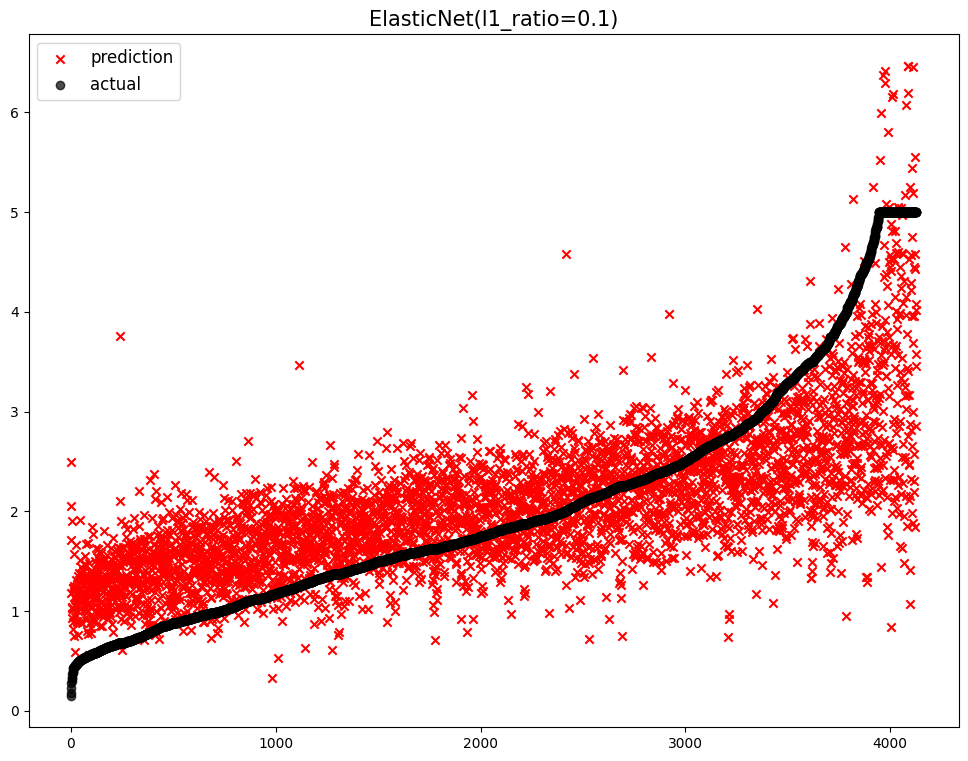

                       model       mse
0            Ridge alpha=100  1.310696
1            Lasso alpha=100  1.310696
2             Ridge alpha=10  1.310227
3             Lasso alpha=10  1.310227
4              Lasso alpha=1  0.938034
5   ElasticNet(l1_ratio=0.1)  0.616577
6            Lasso alpha=0.1  0.613512
7           LinearRegression  0.555892
8         Ridge alpha=0.0001  0.555892
9          Ridge alpha=0.001  0.555892
10          Ridge alpha=0.01  0.555891
11           Ridge alpha=0.1  0.555883
12             Ridge alpha=1  0.555803
13        Lasso alpha=0.0001  0.555683
14         Lasso alpha=0.001  0.553894
15          Lasso alpha=0.01  0.544449


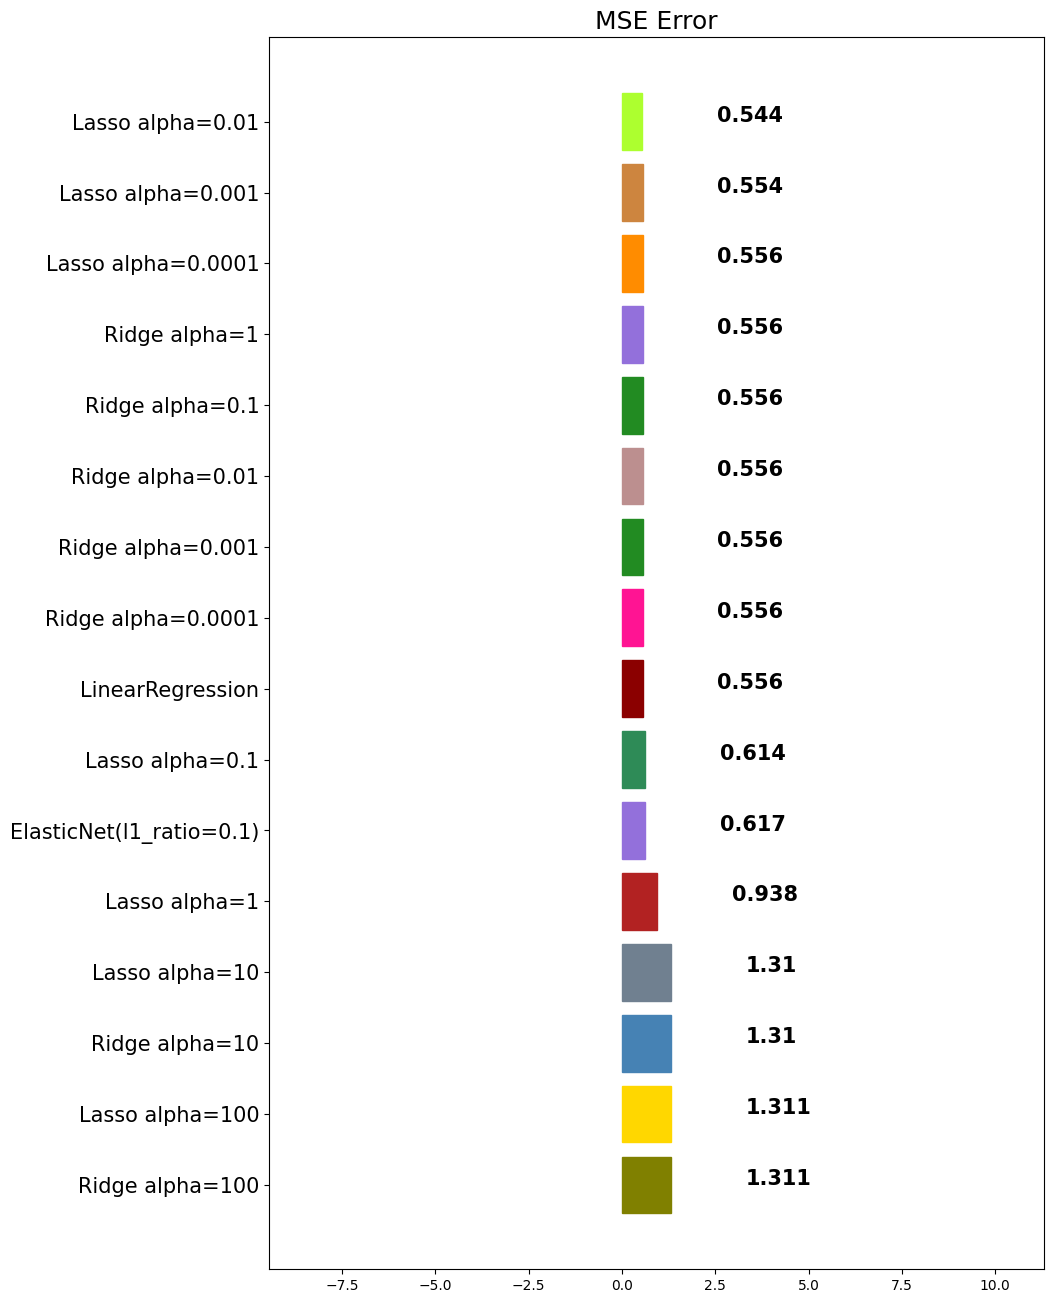

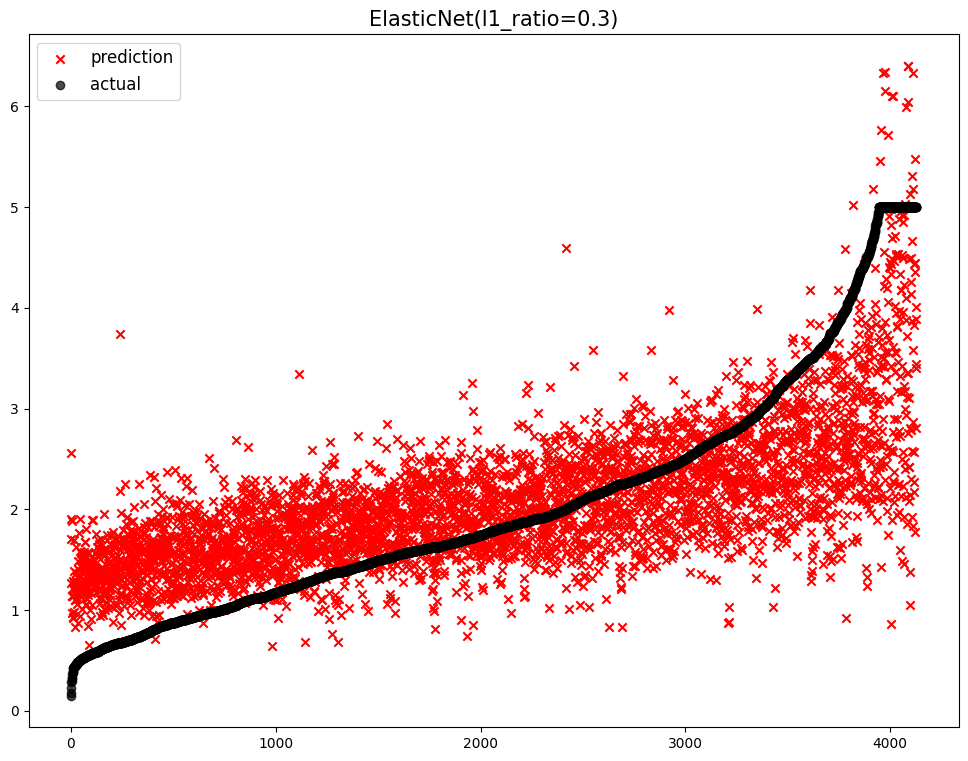

                       model       mse
0            Ridge alpha=100  1.310696
1            Lasso alpha=100  1.310696
2             Ridge alpha=10  1.310227
3             Lasso alpha=10  1.310227
4              Lasso alpha=1  0.938034
5   ElasticNet(l1_ratio=0.3)  0.670324
6   ElasticNet(l1_ratio=0.1)  0.616577
7            Lasso alpha=0.1  0.613512
8           LinearRegression  0.555892
9         Ridge alpha=0.0001  0.555892
10         Ridge alpha=0.001  0.555892
11          Ridge alpha=0.01  0.555891
12           Ridge alpha=0.1  0.555883
13             Ridge alpha=1  0.555803
14        Lasso alpha=0.0001  0.555683
15         Lasso alpha=0.001  0.553894
16          Lasso alpha=0.01  0.544449


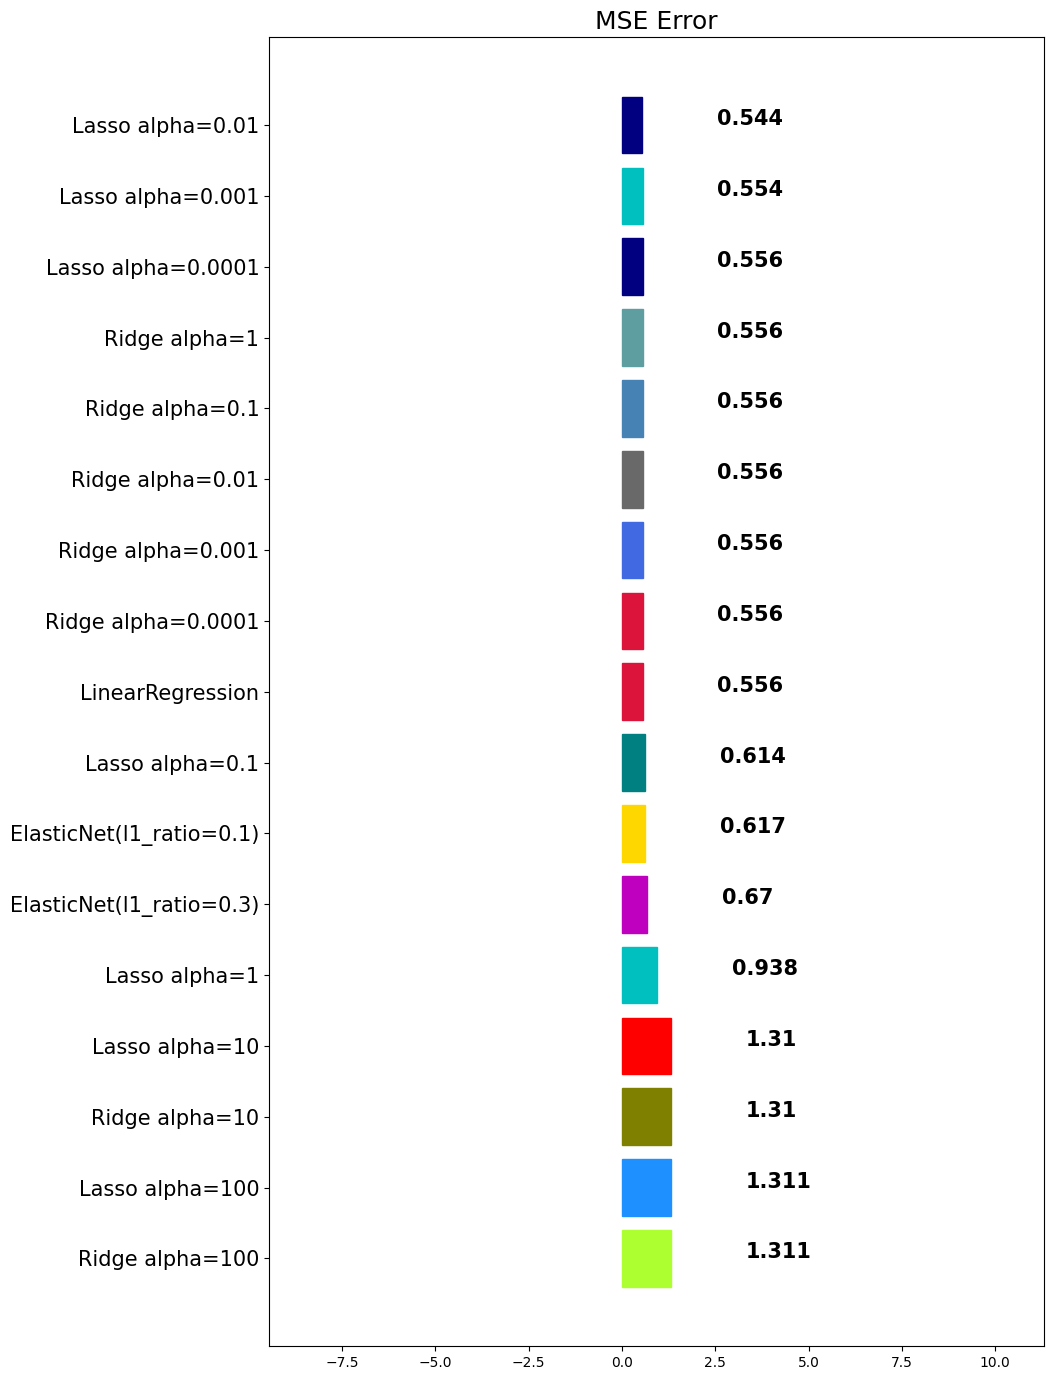

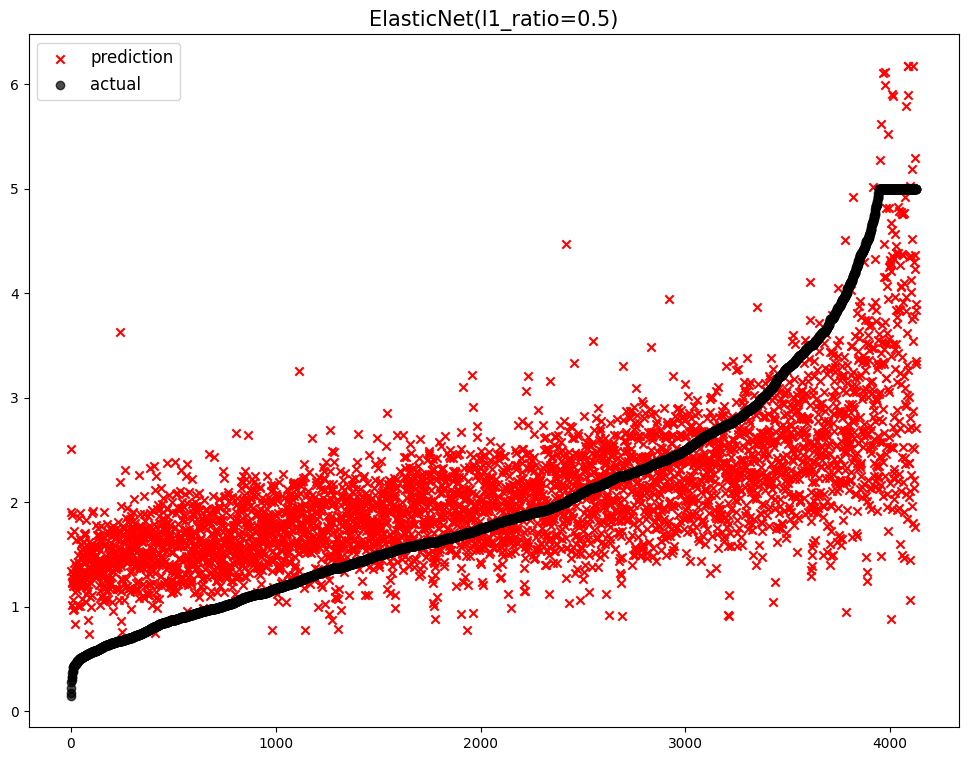

                       model       mse
0            Ridge alpha=100  1.310696
1            Lasso alpha=100  1.310696
2             Ridge alpha=10  1.310227
3             Lasso alpha=10  1.310227
4              Lasso alpha=1  0.938034
5   ElasticNet(l1_ratio=0.5)  0.686873
6   ElasticNet(l1_ratio=0.3)  0.670324
7   ElasticNet(l1_ratio=0.1)  0.616577
8            Lasso alpha=0.1  0.613512
9           LinearRegression  0.555892
10        Ridge alpha=0.0001  0.555892
11         Ridge alpha=0.001  0.555892
12          Ridge alpha=0.01  0.555891
13           Ridge alpha=0.1  0.555883
14             Ridge alpha=1  0.555803
15        Lasso alpha=0.0001  0.555683
16         Lasso alpha=0.001  0.553894
17          Lasso alpha=0.01  0.544449


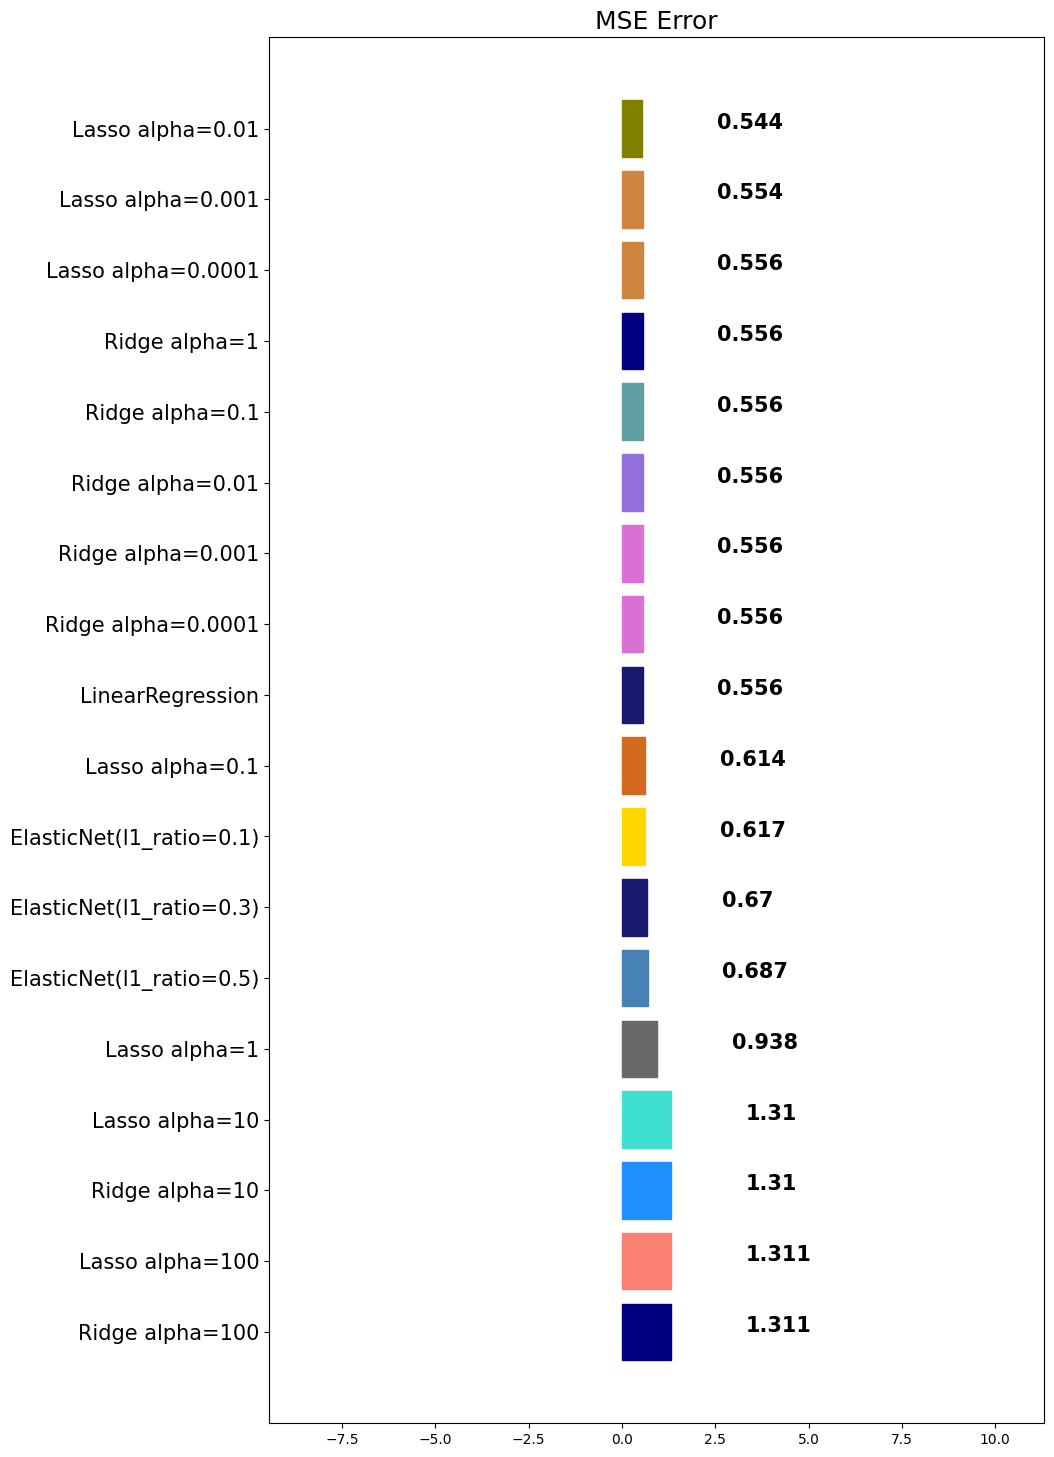

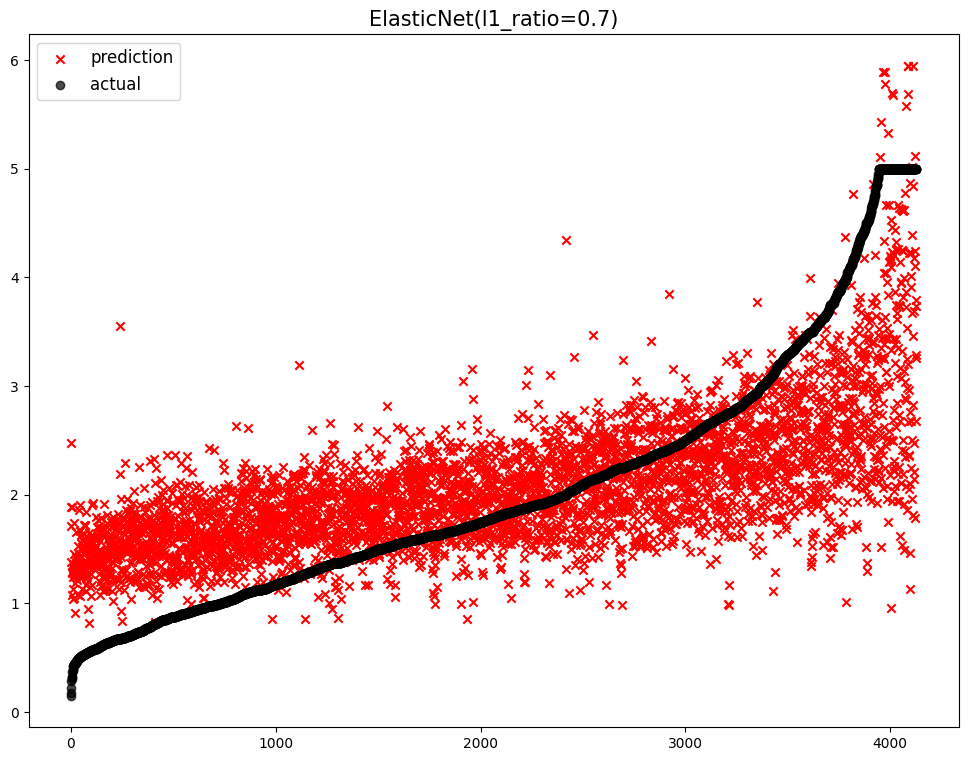

                       model       mse
0            Ridge alpha=100  1.310696
1            Lasso alpha=100  1.310696
2             Ridge alpha=10  1.310227
3             Lasso alpha=10  1.310227
4              Lasso alpha=1  0.938034
5   ElasticNet(l1_ratio=0.7)  0.700064
6   ElasticNet(l1_ratio=0.5)  0.686873
7   ElasticNet(l1_ratio=0.3)  0.670324
8   ElasticNet(l1_ratio=0.1)  0.616577
9            Lasso alpha=0.1  0.613512
10          LinearRegression  0.555892
11        Ridge alpha=0.0001  0.555892
12         Ridge alpha=0.001  0.555892
13          Ridge alpha=0.01  0.555891
14           Ridge alpha=0.1  0.555883
15             Ridge alpha=1  0.555803
16        Lasso alpha=0.0001  0.555683
17         Lasso alpha=0.001  0.553894
18          Lasso alpha=0.01  0.544449


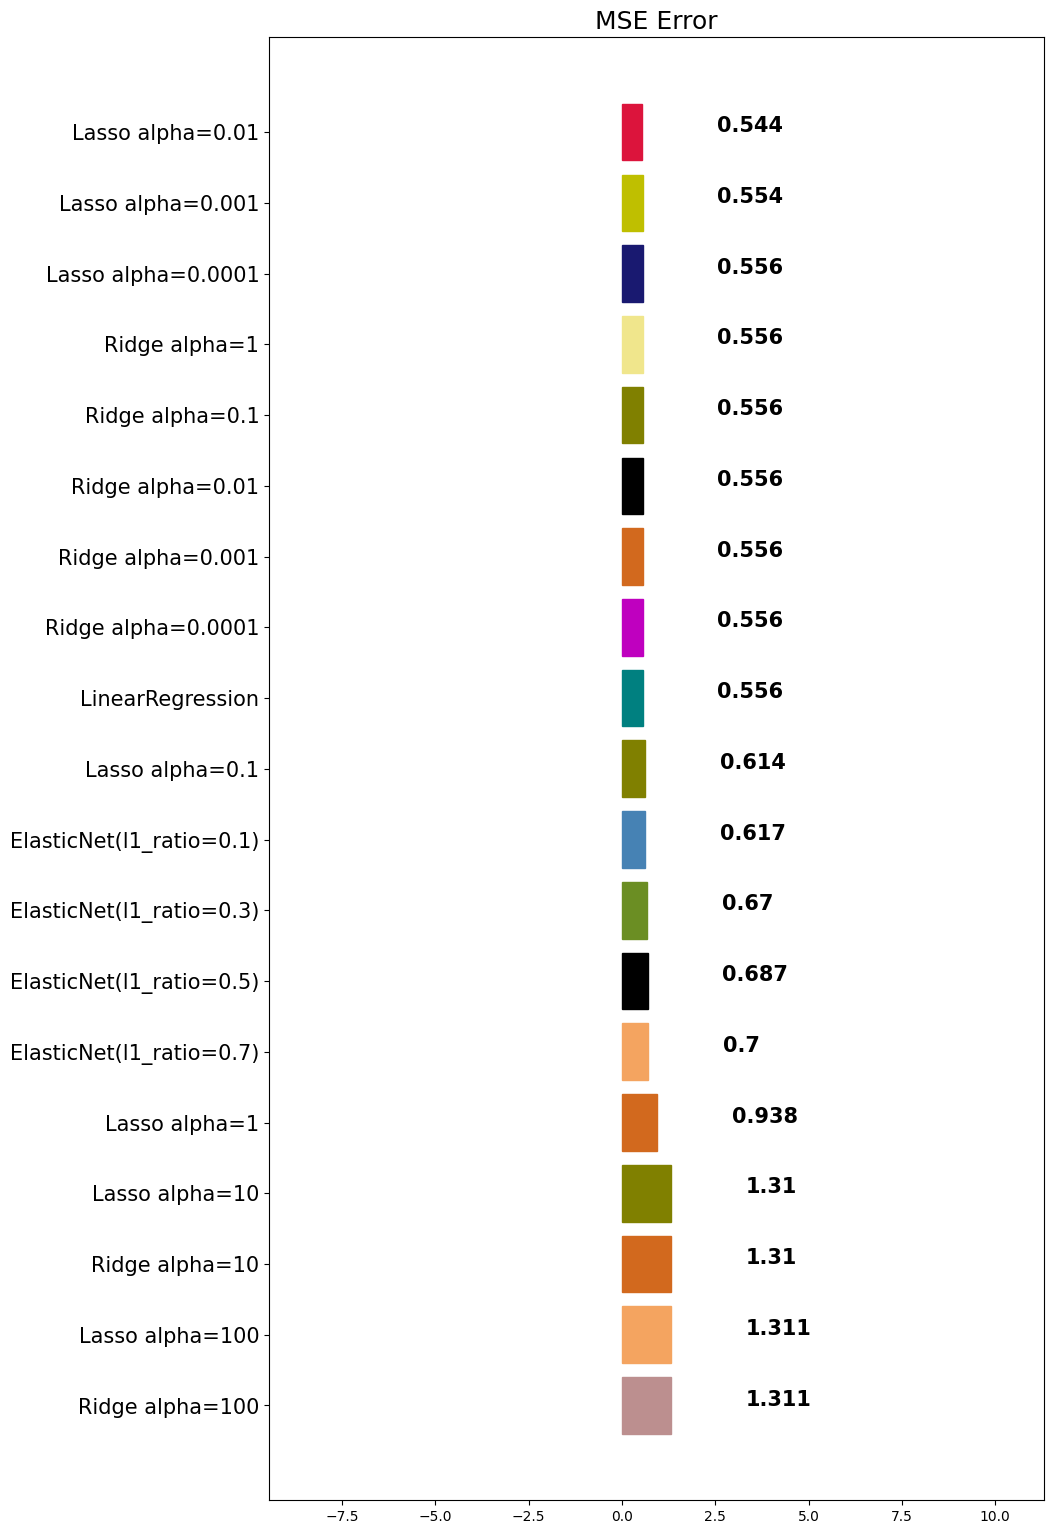

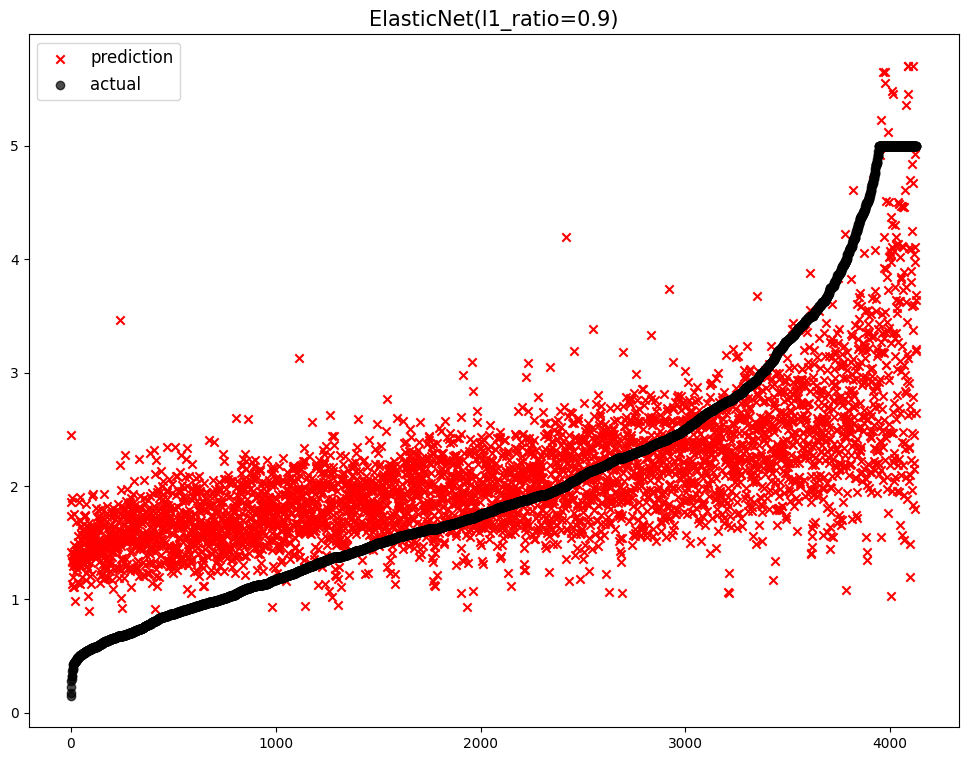

                       model       mse
0            Ridge alpha=100  1.310696
1            Lasso alpha=100  1.310696
2             Ridge alpha=10  1.310227
3             Lasso alpha=10  1.310227
4              Lasso alpha=1  0.938034
5   ElasticNet(l1_ratio=0.9)  0.716693
6   ElasticNet(l1_ratio=0.7)  0.700064
7   ElasticNet(l1_ratio=0.5)  0.686873
8   ElasticNet(l1_ratio=0.3)  0.670324
9   ElasticNet(l1_ratio=0.1)  0.616577
10           Lasso alpha=0.1  0.613512
11          LinearRegression  0.555892
12        Ridge alpha=0.0001  0.555892
13         Ridge alpha=0.001  0.555892
14          Ridge alpha=0.01  0.555891
15           Ridge alpha=0.1  0.555883
16             Ridge alpha=1  0.555803
17        Lasso alpha=0.0001  0.555683
18         Lasso alpha=0.001  0.553894
19          Lasso alpha=0.01  0.544449


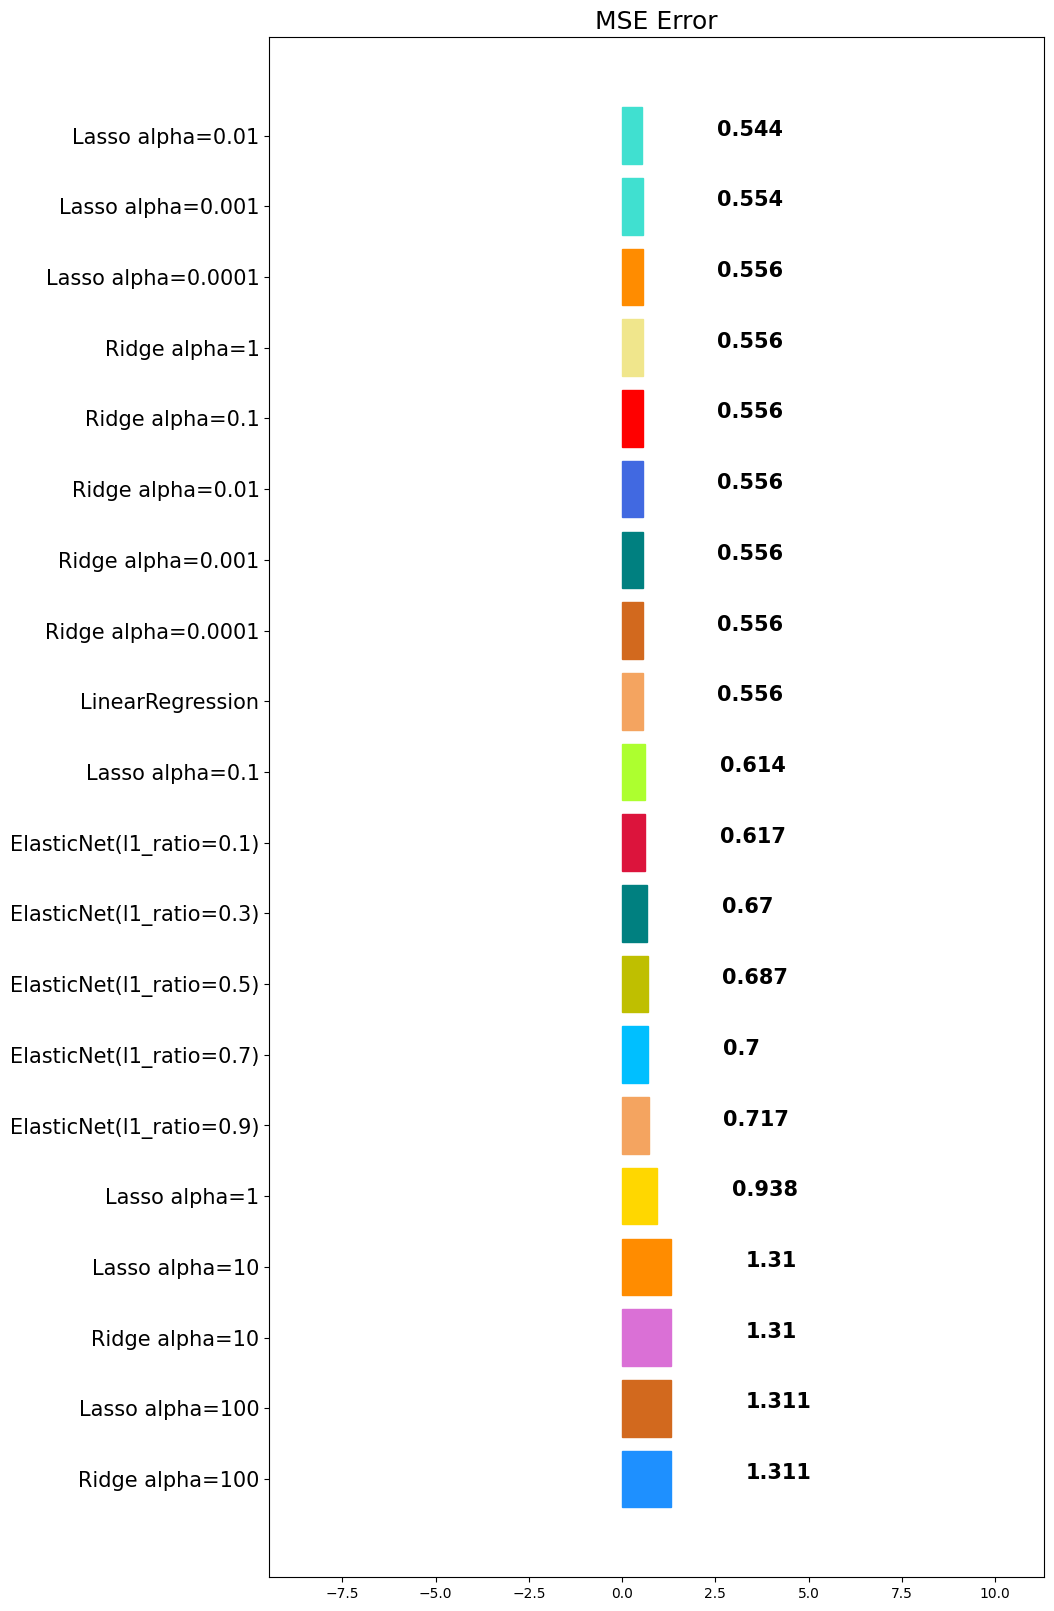

In [50]:
for ratio in ratios:
    elasticnet = ElasticNet(alpha=0.5, l1_ratio=ratio)
    elasticnet.fit(data_train, target_train)
    y_pred = elasticnet.predict(data_test)
    mse_eval('ElasticNet(l1_ratio={})'.format(ratio), y_pred, target_test)

### Scaler를 적용

In [52]:
# Outlier에 가장 강한 스케일러 순서 RobustScaler > StandardScaler > MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# 데이터의 통계 분포
data_train.describe()
data_test.describe()


# scaler = MinMaxScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

# elasticnet = ElasticNet(alpha=0.5, l1_ratio=0.5)
# elasticnet.fit(x_train_scaled, y_train)
# pred = elasticnet.predict(x_test_scaled)
# mse_eval('ElasticNet', pred, y_test)


MedInc     HouseAge     AveRooms    AveBedrms    Population  \
count  4128.000000  4128.000000  4128.000000  4128.000000   4128.000000   
mean      3.830338    28.764293     5.404059     1.096637   1421.571705   
std       1.881515    12.518304     2.794717     0.610196   1114.023136   
min       0.499900     1.000000     0.846154     0.500000      8.000000   
25%       2.548500    18.000000     4.396633     1.004338    781.000000   
50%       3.500000    29.000000     5.192764     1.046715   1160.000000   
75%       4.645925    37.000000     6.008889     1.095908   1722.000000   
max      15.000100    52.000000   132.533333    34.066667  16122.000000   

          AveOccup    Latitude   Longitude  
count  4128.000000  4128.00000  4128.00000  
mean      2.965431    35.58671  -119.51936  
std       1.753316     2.13276     1.99447  
min       1.263566    32.54000  -124.19000  
25%       2.435365    33.93000  -121.69000  
50%       2.823586    34.23000  -118.47000  
75%       3.289374    37.70000  -117.99000  
max      83.171429    41.81000  -114.58000

In [ ]:
# StandardScaler를 사용하여 스케일링

std_scaler = StandardScaler()
std_scaled = std_scaler.fit_transform(data_train)

In [ ]:
df_std_scaled = pd.DataFrame(data = std_scaled)
# 평균, 표준편차가 맞춰짐
df_std_scaled.describe().round(3)

0          1          2          3          4          5  \
count  16512.000  16512.000  16512.000  16512.000  16512.000  16512.000   
mean      -0.000     -0.000      0.000     -0.000      0.000      0.000   
std        1.000      1.000      1.000      1.000      1.000      1.000   
min       -1.775     -2.191     -1.904     -1.762     -1.252     -0.208   
25%       -0.690     -0.842     -0.412     -0.208     -0.561     -0.058   
50%       -0.176      0.031     -0.084     -0.109     -0.228     -0.024   
75%        0.469      0.666      0.262      0.008      0.263      0.016   
max        5.839      1.856     57.167     56.647     30.127    107.116   

               6          7  
count  16512.000  16512.000  
mean       0.000      0.000  
std        1.000      1.000  
min       -1.448     -2.377  
25%       -0.802     -1.111  
50%       -0.647      0.535  
75%        0.972      0.784  
max        2.952      2.629

In [ ]:
#MinMaxScaler
minmax_scaler = MinMaxScaler()

#데이터 변환
minmax_scaled = minmax_scaler.fit_transform(data_train)

# 최솟값 :0, 최댓값 :1로 만들어줌. (이상치엔 약함)
print("Min-Max Scaling 결과:")
df_minmax_scaled =pd.DataFrame(data=minmax_scaled)
df_minmax_scaled.describe().round(4)

Min-Max Scaling 결과:


0           1           2           3           4           5  \
count  16512.0000  16512.0000  16512.0000  16512.0000  16512.0000  16512.0000   
mean       0.2332      0.5413      0.0322      0.0302      0.0399      0.0019   
std        0.1313      0.2471      0.0169      0.0171      0.0319      0.0093   
min        0.0000      0.0000      0.0000      0.0000      0.0000      0.0000   
25%        0.1425      0.3333      0.0253      0.0266      0.0220      0.0014   
50%        0.2101      0.5490      0.0308      0.0283      0.0326      0.0017   
75%        0.2947      0.7059      0.0367      0.0303      0.0483      0.0021   
max        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   

                6           7  
count  16512.0000  16512.0000  
mean       0.3291      0.4749  
std        0.2273      0.1998  
min        0.0000      0.0000  
25%        0.1468      0.2530  
50%        0.1819      0.5817  
75%        0.5500      0.6315  
max        1.0000      1.0000

In [60]:
# RobustScaler
robust_scaler = RobustScaler()

#데이터 변환
robust_scaled = robust_scaler.fit_transform(data_train)

# 최솟값 :0, 최댓값 :1로 만들어줌. (이상치엔 약함)
print("Min-Max Scaling 결과:")
df_robust_scaled =pd.DataFrame(data=robust_scaled)
df_robust_scaled.describe().round(4)

Min-Max Scaling 결과:


0           1           2           3           4           5  \
count  16512.0000  16512.0000  16512.0000  16512.0000  16512.0000  16512.0000   
mean       0.1518     -0.0206      0.1239      0.5051      0.2769      0.3286   
std        0.8630      0.6633      1.4838      4.6165      1.2135     13.6028   
min       -1.3804     -1.4737     -2.7017     -7.6295     -1.2423     -2.4964   
25%       -0.4437     -0.5789     -0.4872     -0.4559     -0.4034     -0.4563   
50%        0.0000      0.0000     -0.0000      0.0000      0.0000      0.0000   
75%        0.5563      0.4211      0.5128      0.5441      0.5966      0.5437   
max        5.1912      1.2105     84.9439    262.0108     36.8356   1457.3714   

                6           7  
count  16512.0000  16512.0000  
mean       0.3649     -0.2822  
std        0.5638      0.5278  
min       -0.4512     -1.5368  
25%       -0.0871     -0.8684  
50%        0.0000      0.0000  
75%        0.9129      0.1316  
max        2.0290      1.1053

### 여러가지 조합 만들기
#### 1. make_pipeline을 사용하여 조합 만들기
1. StandardScaler + ElasticNet (L1_ratio = 0.1)
2. RobustScaler + ElasticNet (L1_ratio = 0.1)
3. MinMaxScaler + ElasticNet (L1_ratio = 0.1)
4. 다항 회귀

In [69]:
from sklearn.pipeline import Pipeline

# 1. 파이프라인(모델) 생성
std_scaled_elastic_pipline = Pipeline([
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet(alpha=0.001, l1_ratio=0.1, max_iter=10000)) # 여기 파라미터 원래 gridsearchCV로 어떤 파라미터가 성능좋은지 쫙 뽑아봐야 해.
])

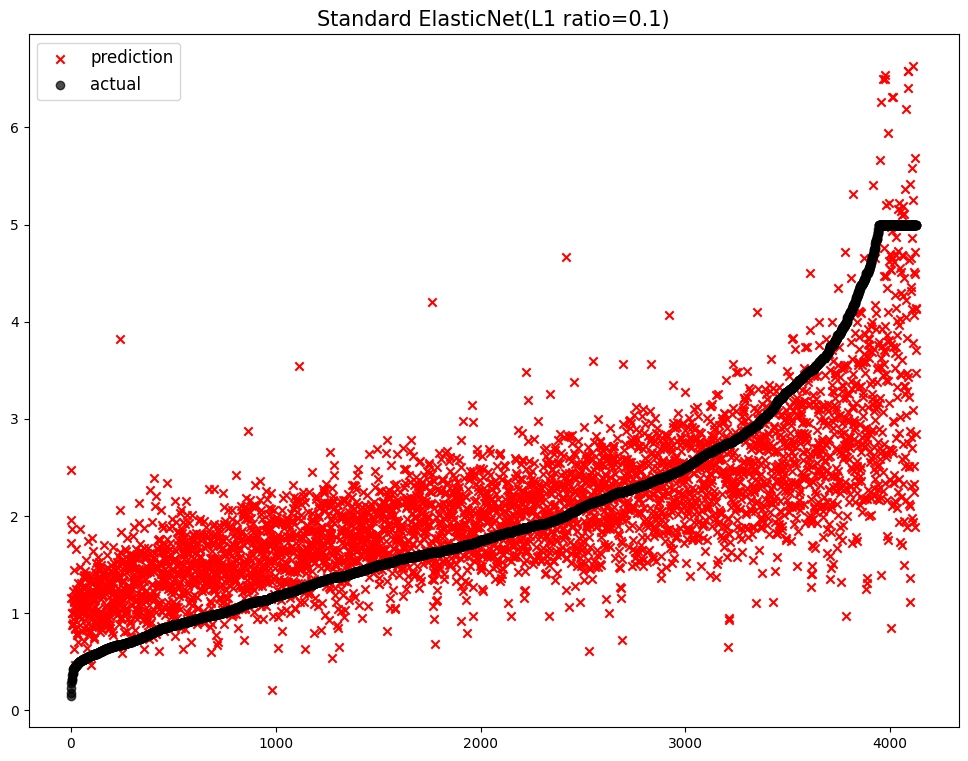

                                model       mse
0                     Ridge alpha=100  1.310696
1                     Lasso alpha=100  1.310696
2                      Ridge alpha=10  1.310227
3                      Lasso alpha=10  1.310227
4                       Lasso alpha=1  0.938034
5            ElasticNet(l1_ratio=0.9)  0.716693
6            ElasticNet(l1_ratio=0.7)  0.700064
7            ElasticNet(l1_ratio=0.5)  0.686873
8            ElasticNet(l1_ratio=0.3)  0.670324
9            ElasticNet(l1_ratio=0.1)  0.616577
10                    Lasso alpha=0.1  0.613512
11                Standard ElasticNet  0.590975
12  Standard ElasticNet(L1 ratio=0.1)  0.590975
13                   LinearRegression  0.555892
14                 Ridge alpha=0.0001  0.555892
15                  Ridge alpha=0.001  0.555892
16                   Ridge alpha=0.01  0.555891
17                    Ridge alpha=0.1  0.555883
18                      Ridge alpha=1  0.555803
19                 Lasso alpha=0.0001  0

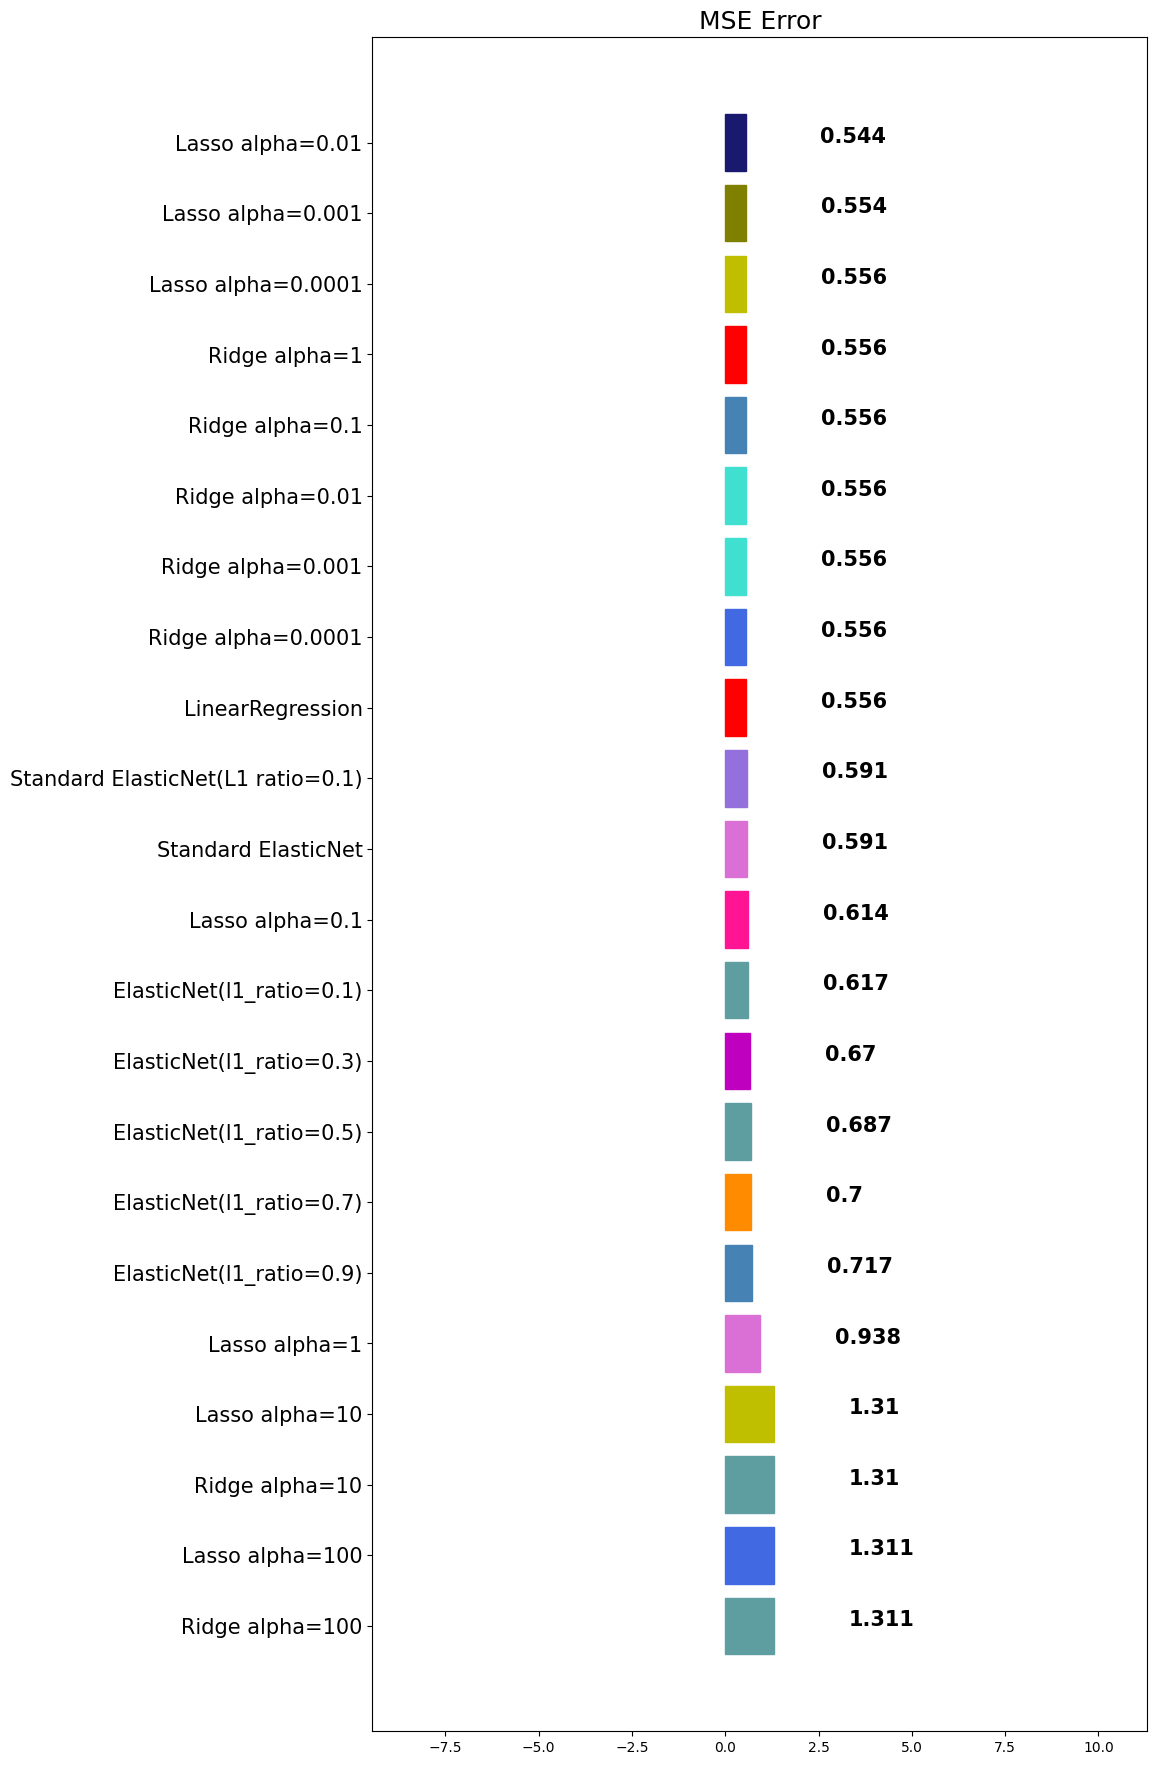

In [ ]:
# 2. 파이프라인(모델) 학습
y_pred = std_scaled_elastic_pipline.fit(data_train, target_train)

# 3. 파이프라인(모델) 예측
y_pred = std_scaled_elastic_pipline.predict(data_test)

# 4. 파이프라인(모델) 평가
mse_eval('Standard ElasticNet(L1 ratio=0.1)',y_pred, target_test)

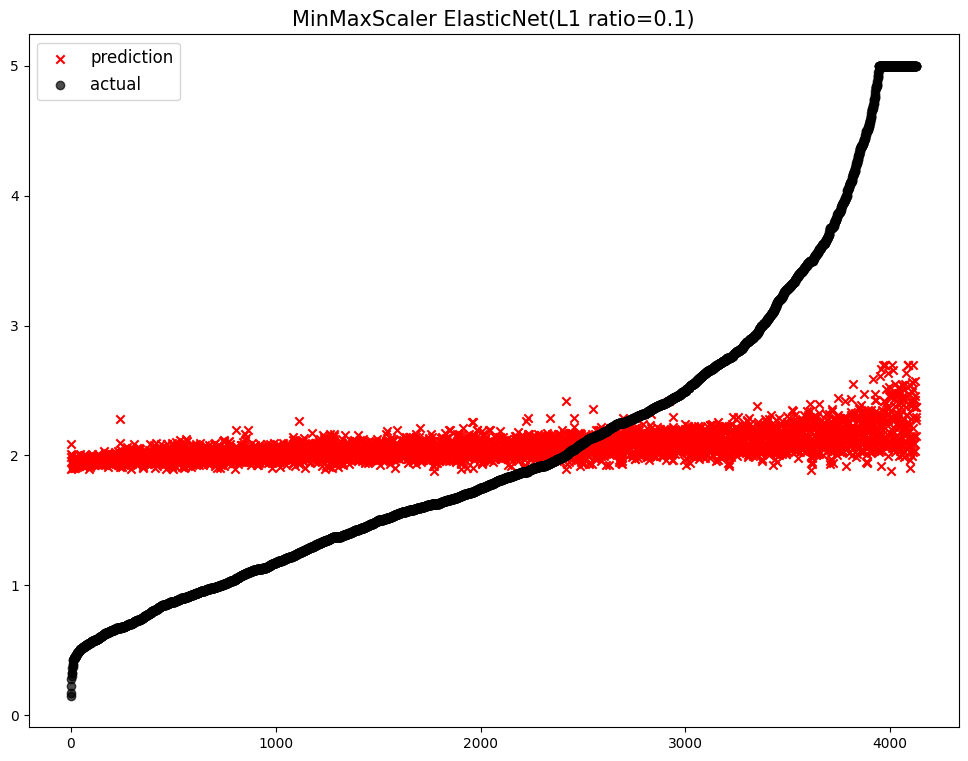

                                    model       mse
0                         Ridge alpha=100  1.310696
1                         Lasso alpha=100  1.310696
2                          Ridge alpha=10  1.310227
3                          Lasso alpha=10  1.310227
4   MinMaxScaler ElasticNet(L1 ratio=0.1)  1.157620
5                           Lasso alpha=1  0.938034
6                ElasticNet(l1_ratio=0.9)  0.716693
7                ElasticNet(l1_ratio=0.7)  0.700064
8                ElasticNet(l1_ratio=0.5)  0.686873
9                ElasticNet(l1_ratio=0.3)  0.670324
10               ElasticNet(l1_ratio=0.1)  0.616577
11                        Lasso alpha=0.1  0.613512
12                    Standard ElasticNet  0.590975
13                       LinearRegression  0.555892
14                     Ridge alpha=0.0001  0.555892
15                      Ridge alpha=0.001  0.555892
16                       Ridge alpha=0.01  0.555891
17                        Ridge alpha=0.1  0.555883
18          

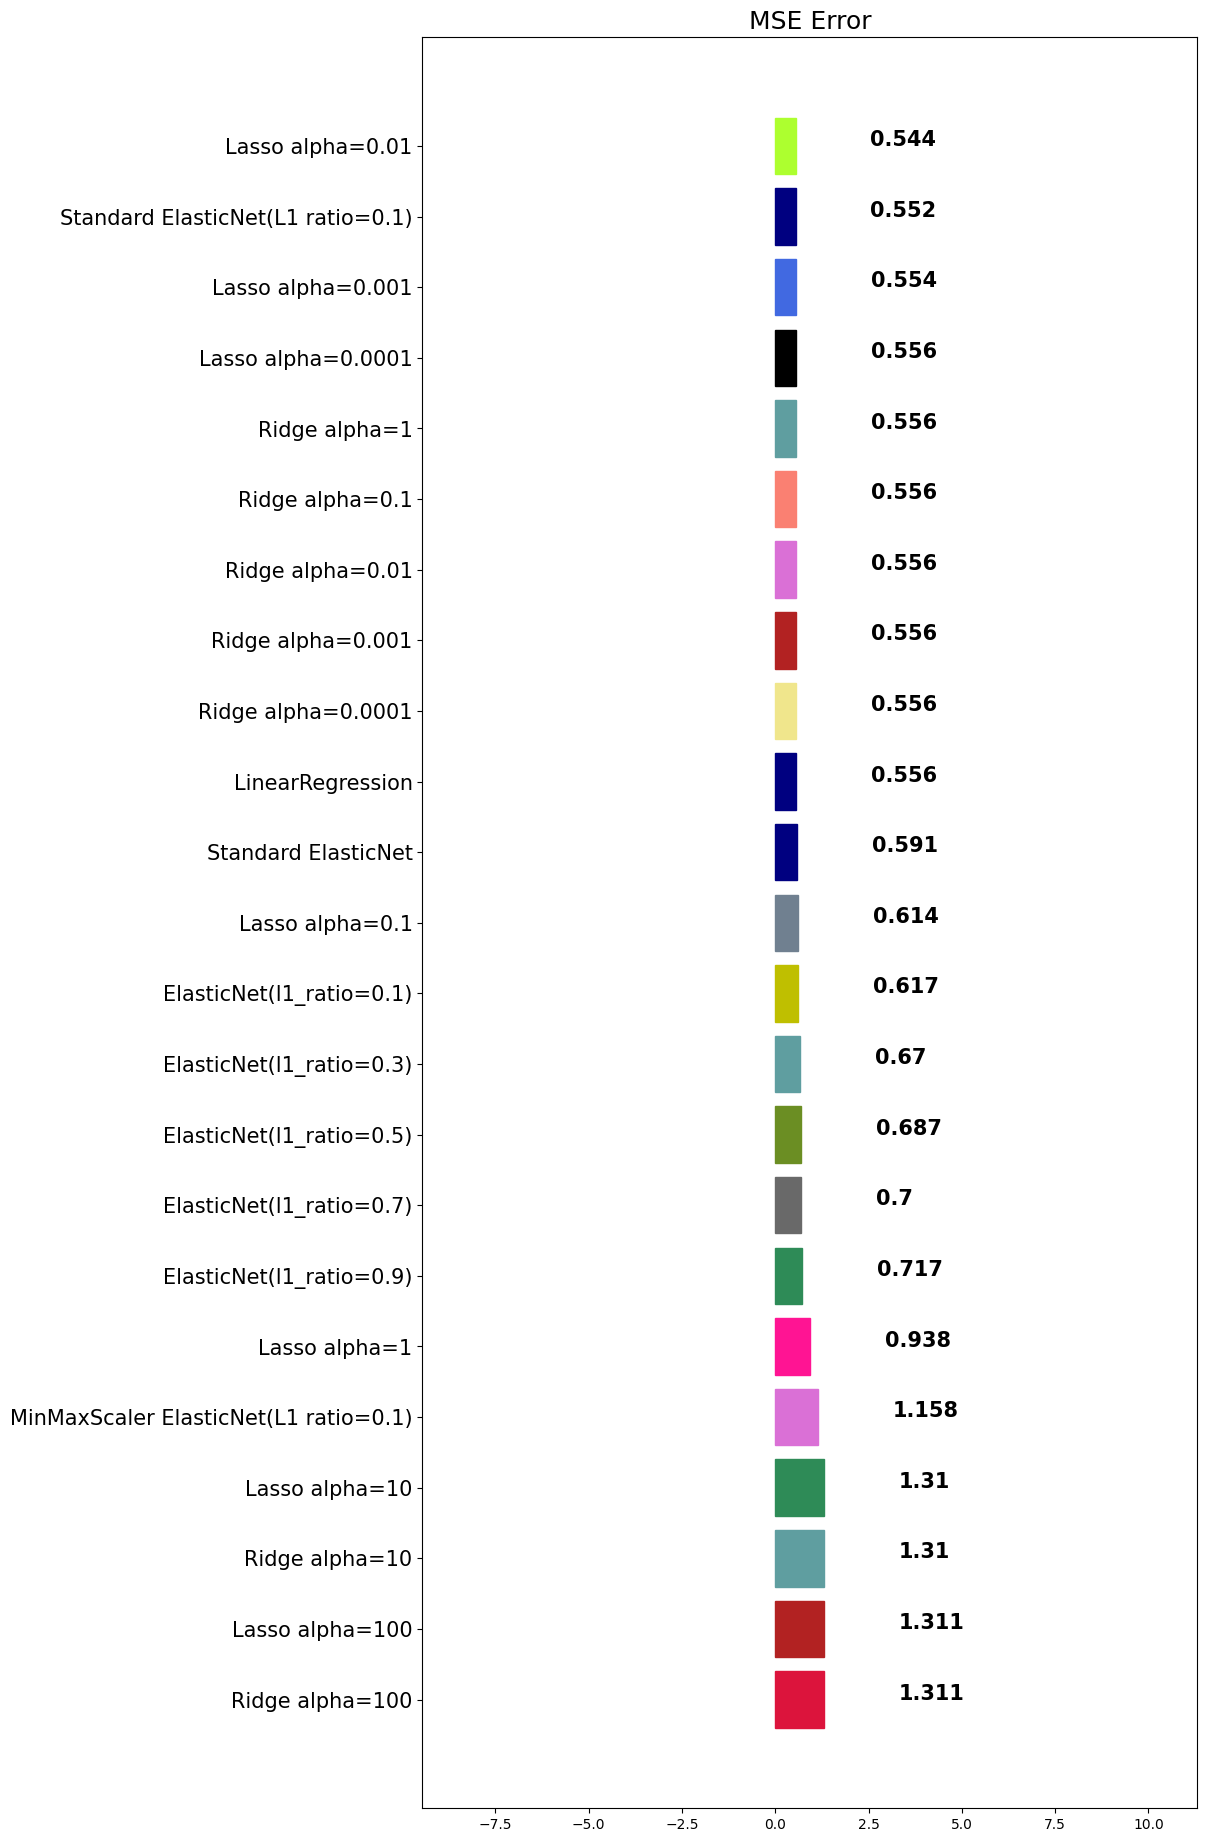

In [70]:
from sklearn.pipeline import Pipeline

# 1. 파이프라인(모델) 생성
std_scaled_elastic_pipline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('elasticnet', ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)) # 여기 파라미터 원래 gridsearchCV로 어떤 파라미터가 성능좋은지 쫙 뽑아봐야 해.
])

# 2. 파이프라인(모델) 학습 
y_pred = std_scaled_elastic_pipline.fit(data_train, target_train)

# 3. 파이프라인(모델) 예측
y_pred = std_scaled_elastic_pipline.predict(data_test)

# 4. 파이프라인(모델) 평가
mse_eval('MinMaxScaler ElasticNet(L1 ratio=0.1)',y_pred, target_test)